# Part 1: Data Loading and Exploration

## 1.1 Data Loading and Initial Inspection

In [255]:
# Error: Unable to verify the SSL certificate of the dataset.
# Import ssl and run code to disable ssl verification.
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Load dataset.
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

# Create DataFrame with data displayed in rows and feature_names as columns.
import pandas as pd
import numpy as np

# Error: calculations were displayed in scientific notation.
# Prevent scientific notation for numbers < 0.
np.set_printoptions(suppress=True, precision=4)

# Assign feature variables as columns.
data = pd.DataFrame(data=california.data, columns=california.feature_names)

# Display first and last rows of data.
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [256]:
# Display DataFrame (total rows of 20640, total columns of 8).
data.shape

(20640, 8)

In [257]:
# Display feature variables, which are all numeric data types of floats.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [258]:
# Set median house value as target variable.
data["MedHouseValue"] = california.target

In [259]:
# Display numerical descriptions of each column. 
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## 1.2 Comprehensive EDA
### A. Target Variable Analysis:

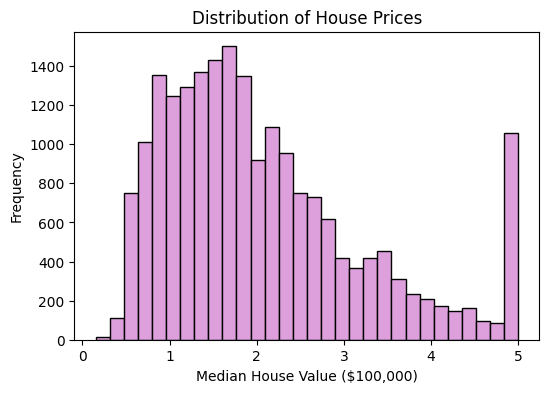

In [260]:
import matplotlib.pyplot as plt

# Display histogram
plt.figure(figsize=(6,4))
plt.hist(data["MedHouseValue"], bins=30, color='plum', edgecolor='black')
plt.title("Distribution of House Prices")
plt.xlabel("Median House Value ($100,000)")
plt.ylabel("Frequency")
plt.show()

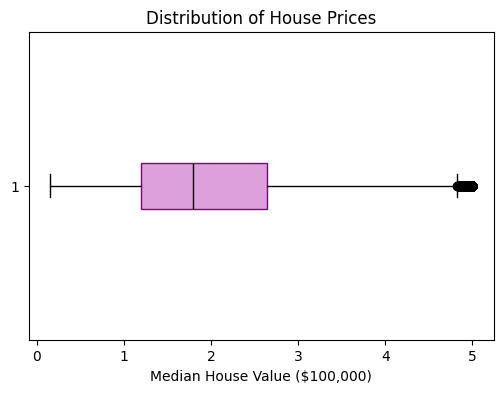

In [261]:
# Display boxplot
plt.figure(figsize=(6,4))
plt.boxplot(data["MedHouseValue"], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='plum', edgecolor='purple'), medianprops=dict(color='black'))
plt.title("Distribution of House Prices")
plt.xlabel("Median House Value ($100,000)")
plt.show()

In [262]:
# Summary statistics of median house value. 
data["MedHouseValue"].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseValue, dtype: float64

### 1.2.A Interpretation:
The house prices can be categorized as:

- Low (Price > 25%): Below 119,600.
- Average (25% <= Price <= 75%): Between 119,600 and 264,725.
- High (Price > 75%): Above 264,725.

The mean of 296,856 is between the average house prices of 119,600 and 264,725. Based on the summary statistics, house prices below 119,600 and above 264725 are considered to be potential outliers. For example, minimum price of 14,999 and maximum price of 500,000 are potential outliers.

In [263]:
print("Potential Outliers Using Quartiles:")
print("Outliers Below $119,600: ", (data["MedHouseValue"] < 1.196).sum())
print("Outliers Above $264,725: ", (data["MedHouseValue"] > 2.647).sum())

Potential Outliers Using Quartiles:
Outliers Below $119,600:  5156
Outliers Above $264,725:  5160


### B. Feature Analysis:

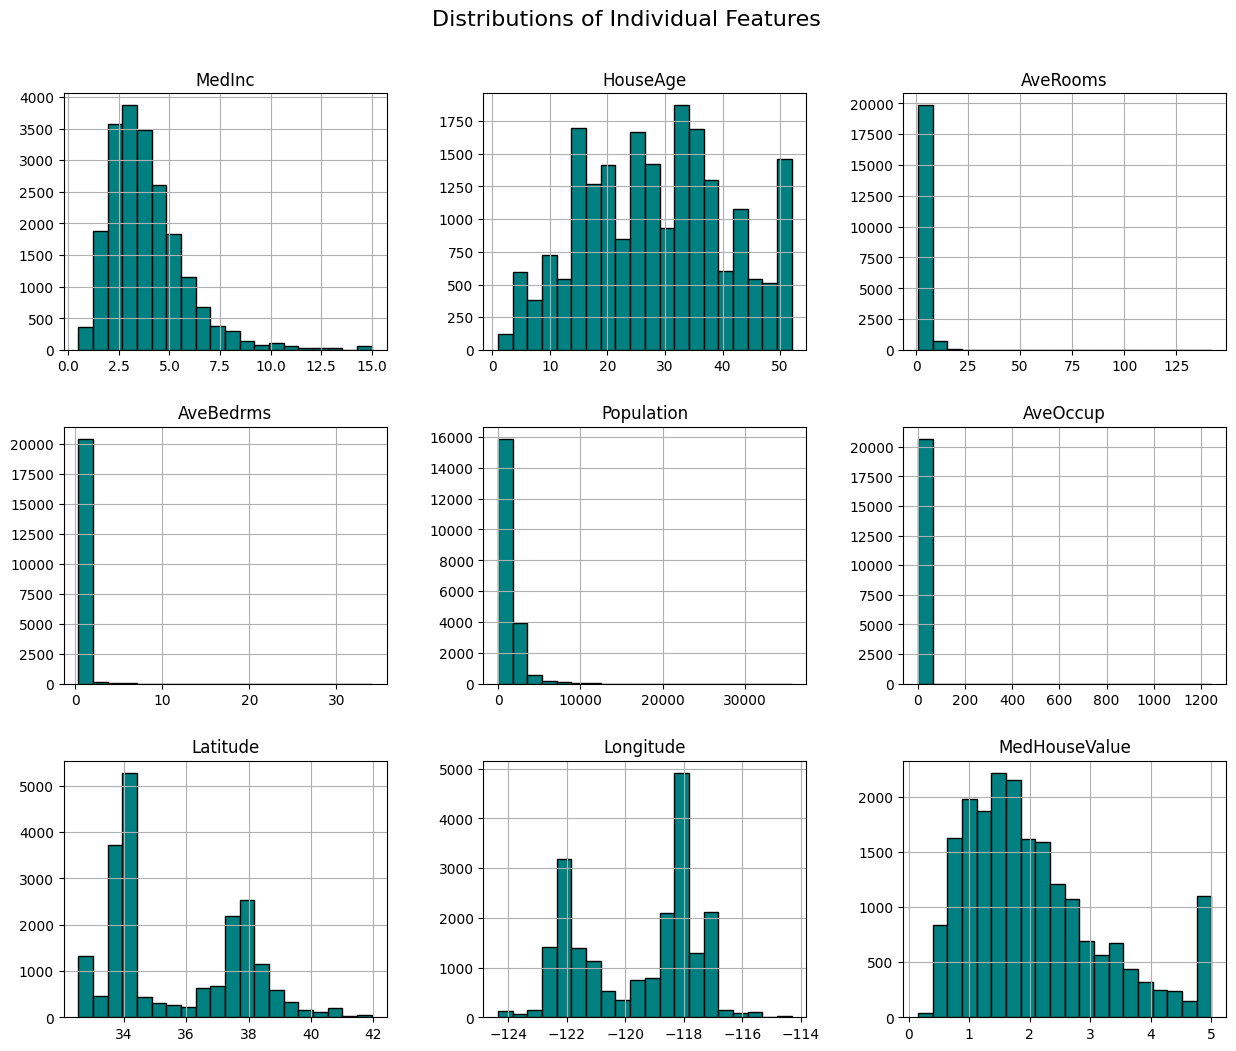

In [264]:
# Display histograms for all features.
data.hist(figsize=(15, 12), bins=20, color="teal", edgecolor="black")

plt.suptitle("Distributions of Individual Features", fontsize=16, y=0.95)
plt.show()

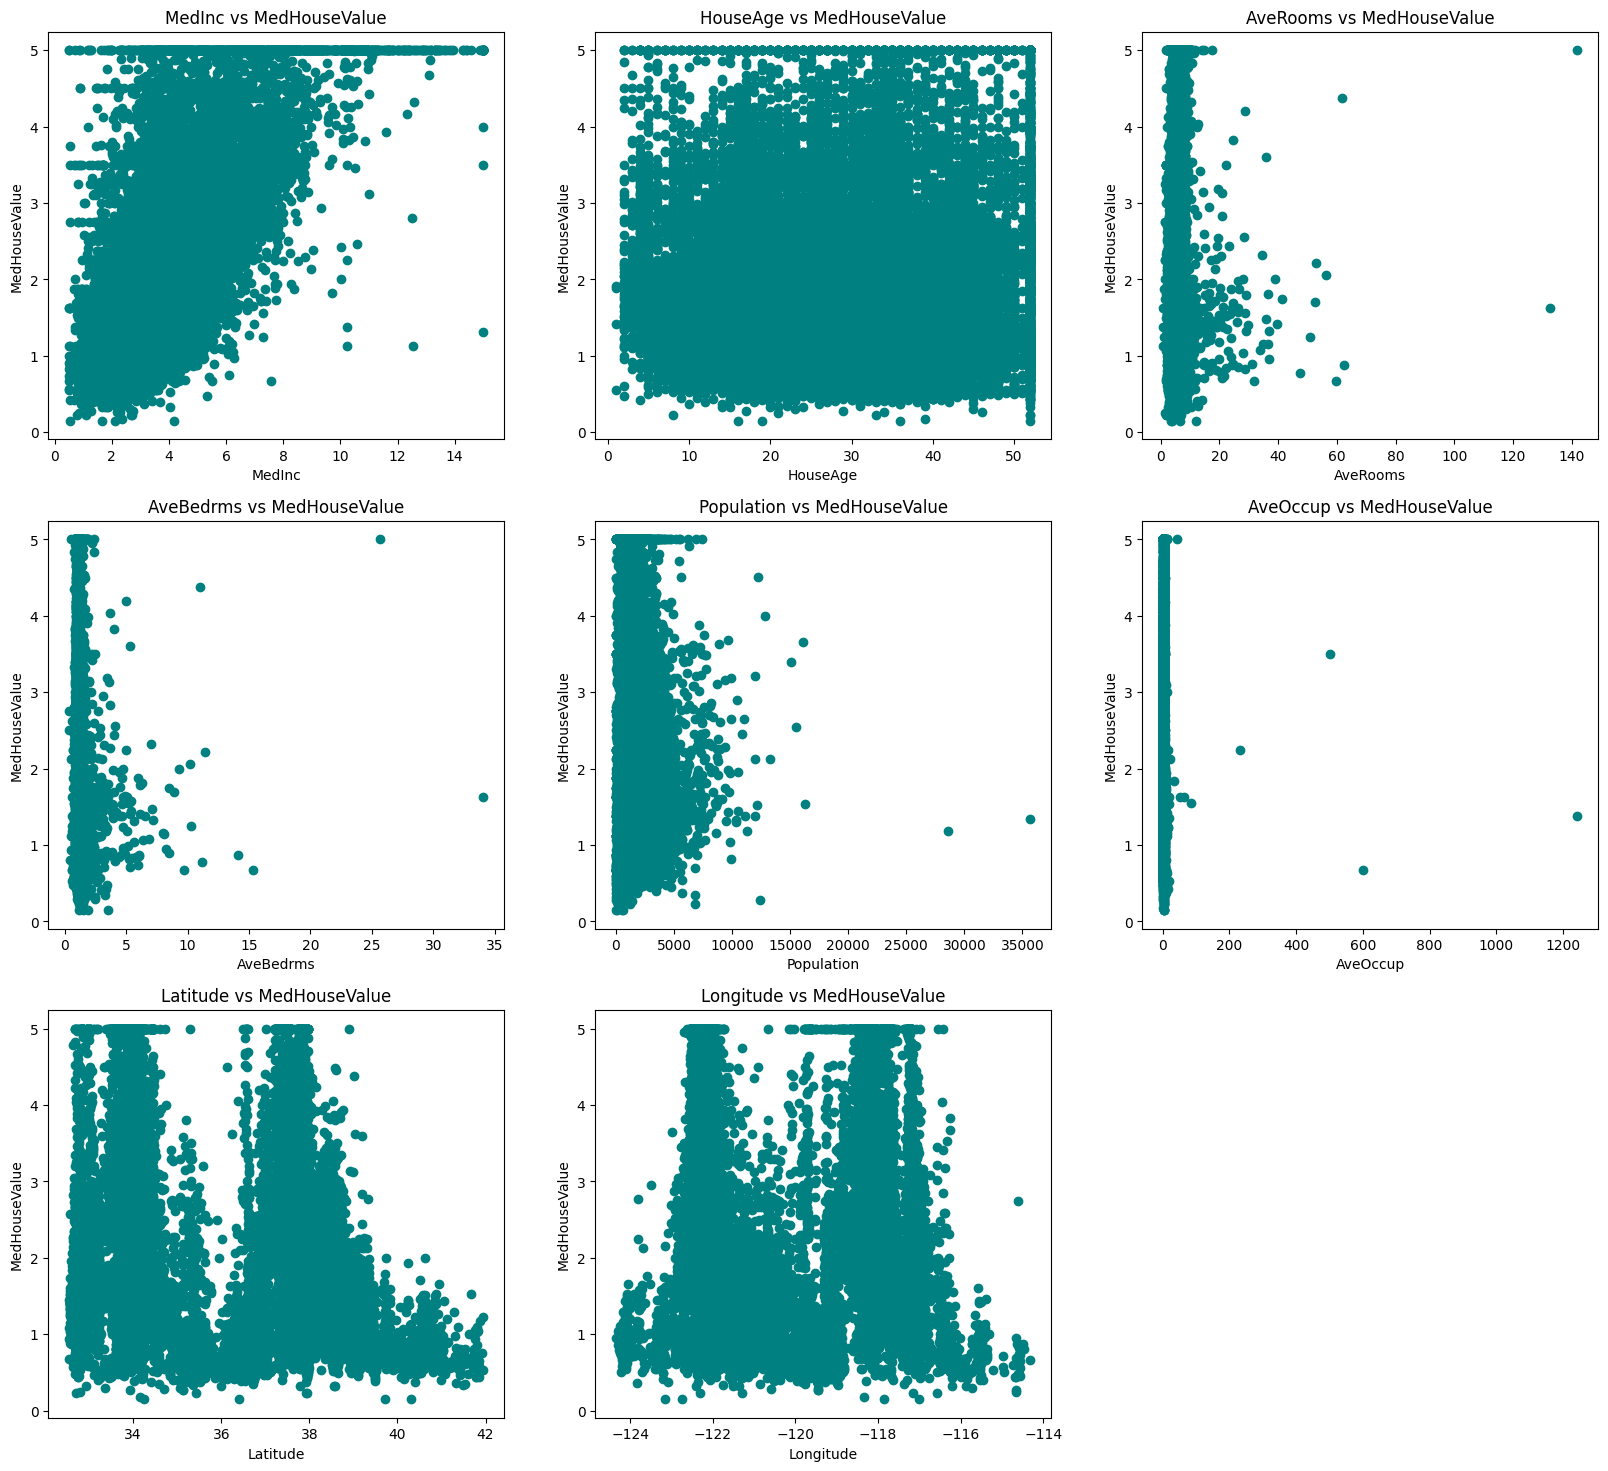

In [265]:
# Seperate features from target variable.
features = data.drop("MedHouseValue", axis=1).columns

plt.figure(figsize=(20, 18))

# Display scatter plots in a 3x3 grid
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)

    # Display scatter plots of each feature vs target variable
    plt.scatter(data[col], data["MedHouseValue"], c="teal")
    plt.xlabel(col)
    plt.ylabel("MedHouseValue")
    plt.title(f"{col} vs MedHouseValue")

plt.show()

### 1.2.B Interpretation: Skewed Distributions
A majority of the features are skewed towards the right, including the target variable of median house value. This aligns with the MedHousePrice distributions in 1.2.A, where a majority of the data clustered towards the left with extreme outliers towards the right of the graphs. Skewed distributions are expected in certain features, such as average rooms, average bedrooms, average population, and average occupancy. These features tend to have smaller values, as shown in the histogram and scatter plots. However, the scatterplots emphasize outlier points in these features. 

Longitude and latiude are also expected to be skewed depending on the geography on the state. While these features provide insights on house prices in particular locations, the skewed distributions are not as likely to impact data testing. The distribution for house age displays a slight skew towards the left, but a majority of data is spread evenly throughout the graphs. The skewed distributions that are likely to yield unreliable results are median income and median house value. As shown in the scatterplot, there  are many outliers for median income and median house value, which may skew results.

Therefore StandardScaler and MinMaxScaler are not reccomended to tranform the data. These scaling methods rely on the mean, standard deviation, minimum points and maximum points of data. These values are likely to be influenced by outliers. RobustScaler is the reccomended approach because medians and quartiles are used to address outliers. As shown in the interpretation for 1.2.A, quartiles enable outlier identification by comparing values against the entire dataset, rather than averages.

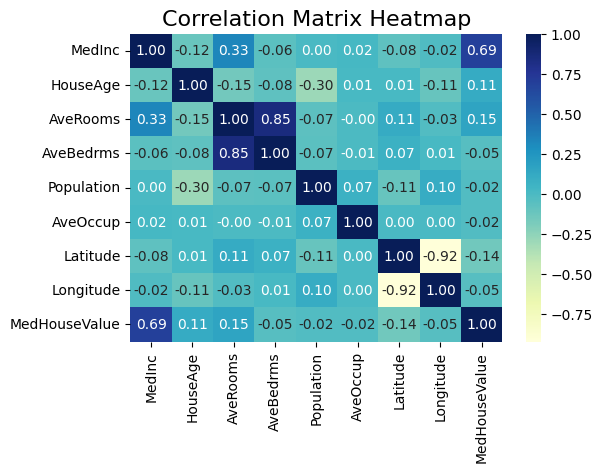

In [266]:
import seaborn as sns

# Create correlation matrix
corr = data.corr()

# Display correlation matrix for all features.
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

### 1.2.B Interpretation: Correlation Matrix Heatmap

Feature pairs with strong correlations include:
- Average Rooms & Bedrooms: 0.85
- Median Income & House Value: 0.69
- Longitude & Longtude: -0.92

### C. Geographic Analysis:

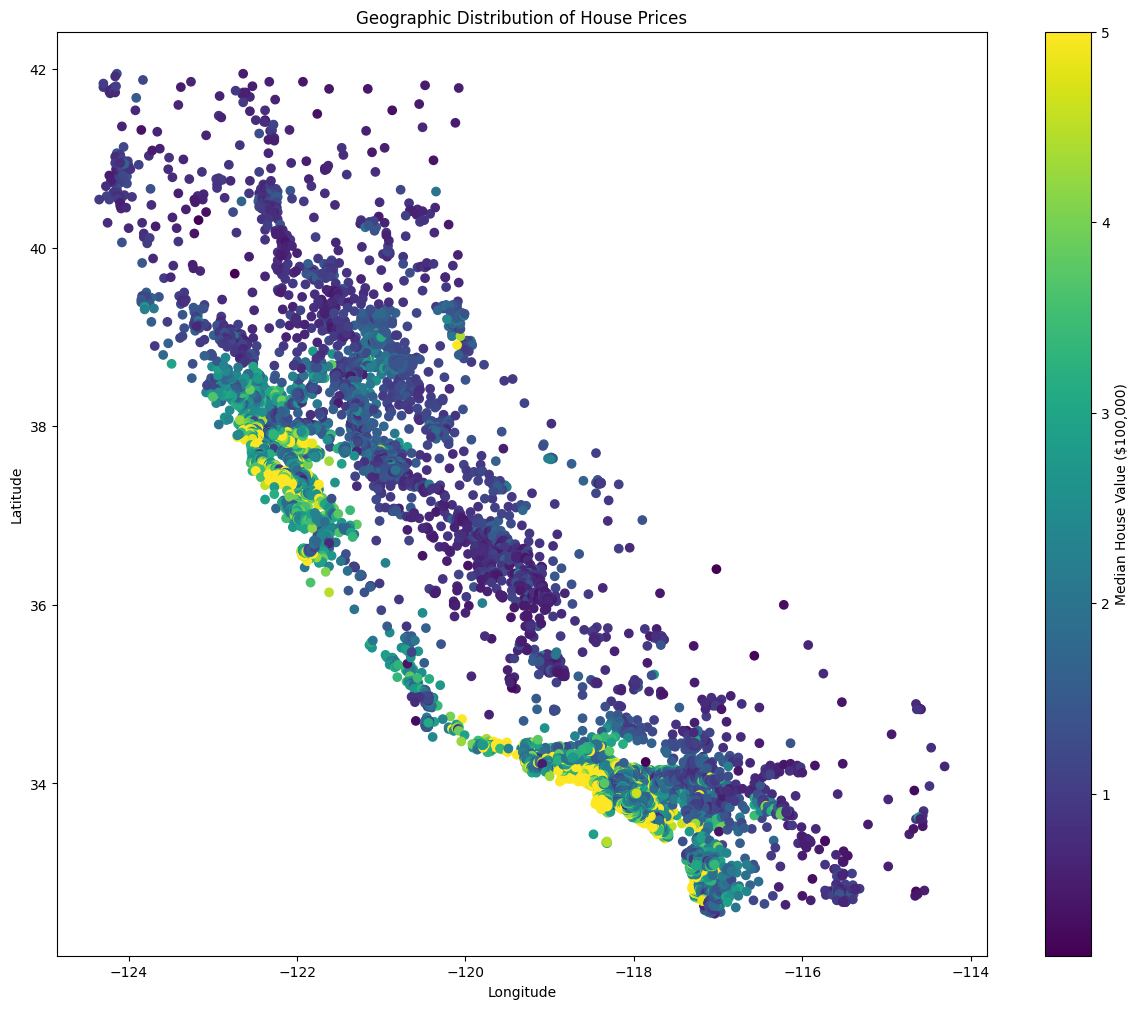

In [267]:
# Display scatter plot of Latitude vs. Longitude colored by house price.
plt.figure(figsize=(15, 12))
scatter = plt.scatter(data["Longitude"],data["Latitude"], c=data["MedHouseValue"],cmap="viridis")

plt.colorbar(scatter, label="Median House Value ($100,000)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of House Prices")
plt.show()

### 1.2.C Interpretation:

The geographic patterns align with the strong negative correlation (-0.92) between longitude and latitude. House prices tend to be higher in Southwestern California and lower in Northeastern California. House prices tend to be the highest near major cities and coastal regions, such as San Diego, Los Angeles, San Jose, or San Francisco. In contrast, house prices are much lower in inland areas. Therefore, coastal proximity is a key feature in California's geography that impacts housing prices. Locations near the coast are likley to have higher house prices, in comparison to inland areas.

### D. Feature Relationships:

### 1.2.D Interpretation: Correlations
The three strongest correlations with target variable are:
- Median Income (0.69): high-income individuals are likely to purchase houses at higher prices.
- Average Rooms (0.15): homes with a higher number of rooms may cost more. 
- Latitude (-0.14): homes in Southern California have higher prices.

Text(0.5, 1.0, 'Latitude vs House Prices')

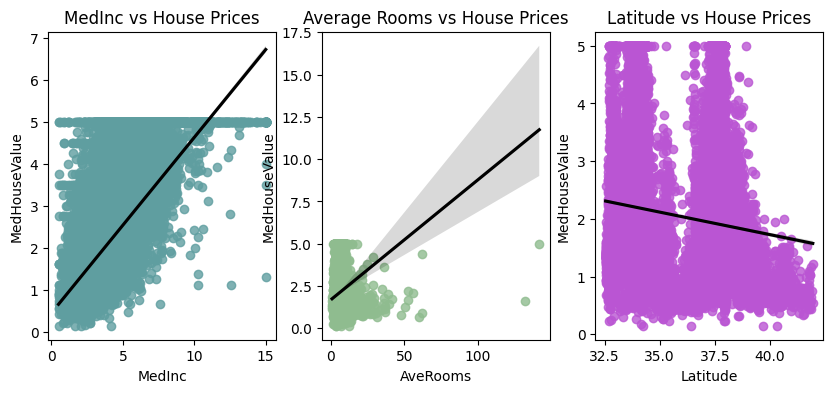

In [268]:
# Display scatterplots for median income, average rooms, and latitude with trend lines.
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
sns.regplot(x="MedInc", y="MedHouseValue", data=data, color="cadetblue", line_kws={"color":"black"})
plt.title("MedInc vs House Prices")

plt.subplot(1, 3, 2)
sns.regplot(x="AveRooms", y="MedHouseValue", data=data, color="darkseagreen", line_kws={"color":"black"})
plt.title("Average Rooms vs House Prices")

plt.subplot(1, 3, 3)
sns.regplot(x="Latitude", y="MedHouseValue", data=data, color="mediumorchid", line_kws={"color":"black"})
plt.title("Latitude vs House Prices")

### 1.2.D Interpretation: Multicolinearity (0.50 > c < -0.50)

The majority of correlations for feature variables range from -0.15 to 0.33. Therefore, features variables that have correlations less than -0.50 and greater than 0.50 are highly correlated. Based on 1.2.B, average rooms and average bedrooms have a high positive correlation of 0.85, implying homes with more rooms are likley to have more bedrooms. As shown in 1.2.C, latitude and longitude have a strong negative correlation because house prices are higher along the cost of Southern California. As latitude decreases, longitude and house prices increase.

Additional features with semi-strong correlations include average rooms and median income (0.33), as well as population and house age (-0.30). Both average rooms and median income have a positive correlation with house pricing, which could impact their correlation with eachother. Individuals with high-incomes can afford homes with more rooms, which tend to be higher in price point. There is a negative correlation between population and house age, emphasizing that individuals are likley to buy newer homes. As found in 1.2.C, house pricing is more expensive in major cities, which are likley to be more densely populated, and invest in housing development.  

### 1.2 EDA Findings Summary:

California's geography and individual income contribute strongly to housing prices. As shown in the visualizations, individuals with high incomes are likely to buy homes at higher price points. Housing pricing tends to be higher in coastal cities, which are likely to have better job oppurtunities and higher populations. The correlations between median income and latitude (-0.08) and latitude and population (-0.11) are low. However, the negative correlations suggest that median income and population tend to be higher in Southern California. 

Potential challanges arise from outliers within the dataset. While 1.2.B mentiones reccomendations to address outliers, outliers can hinder model performance. For example, there are extreme outliers depicted in the scatter plots of features and house value. These values can skew model predictions by inaccurately labeling or classifying data during the training phase. Additionally, there are 10,316 house prices that are below the first quartile and above the third quartile of the dataset. This creates error in predicting target variables by introducing extreme variables, such as 500,000 price point. Additionally, certain features contribute to housing prices, but cannot be tested on without modifications. This includes longitude and latitude, which indicate proximity to major cities and coastal areas.  

# Part 2: Data Cleaning and Preprocessing
## 2.1 Missing Value Analysis

In [269]:
# Check for missing values
data.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

### Interpretation:
No missing values exist, therefore no data cleaning is required.

## 2.2 Outlier Detection and Handling

### Method One: Statistical Outlier Detection

In [270]:
# Assign data labels to outliers.
outliers = pd.DataFrame(index = data.index)

def detect_outliers_iqr(data, factor=1.5):
    
    # Calculate IQR and bounds for all columns.
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        outliers[column] =(data[column] < lower_bound) | (data[column] > upper_bound)

    return outliers

detect_outliers_iqr(data, factor=1.5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,True,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [271]:
# Outlier removal

for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_IQR = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
data_IQR

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Method Two: Z-Score Outlier Detection

In [272]:
# Assign data labels to outliers.
outliers = pd.DataFrame(index = data.index)

threshold = 3

def detect_outliers_zscore(data, threshold):

    # Calculate z_scores for all columns.
    for column in data.columns:
        mean = data[column].mean()
        std = data[column].std()
        z_scores = (data[column] - mean) / std
        
        outliers = data[np.abs(z_scores) > threshold]

    return outliers

# Decrease threshold to identify outliers.
while detect_outliers_zscore(data, threshold).shape[0] == 0:
    threshold = threshold - 0.1

print("Z-Score Threshold: ", round(threshold,2))
detect_outliers_zscore(data, threshold)

Z-Score Threshold:  2.5


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


In [273]:
# Outlier removal

for column in data.columns:
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    data_zscore = data[np.abs(z_scores) <= threshold]
     
data_zscore

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


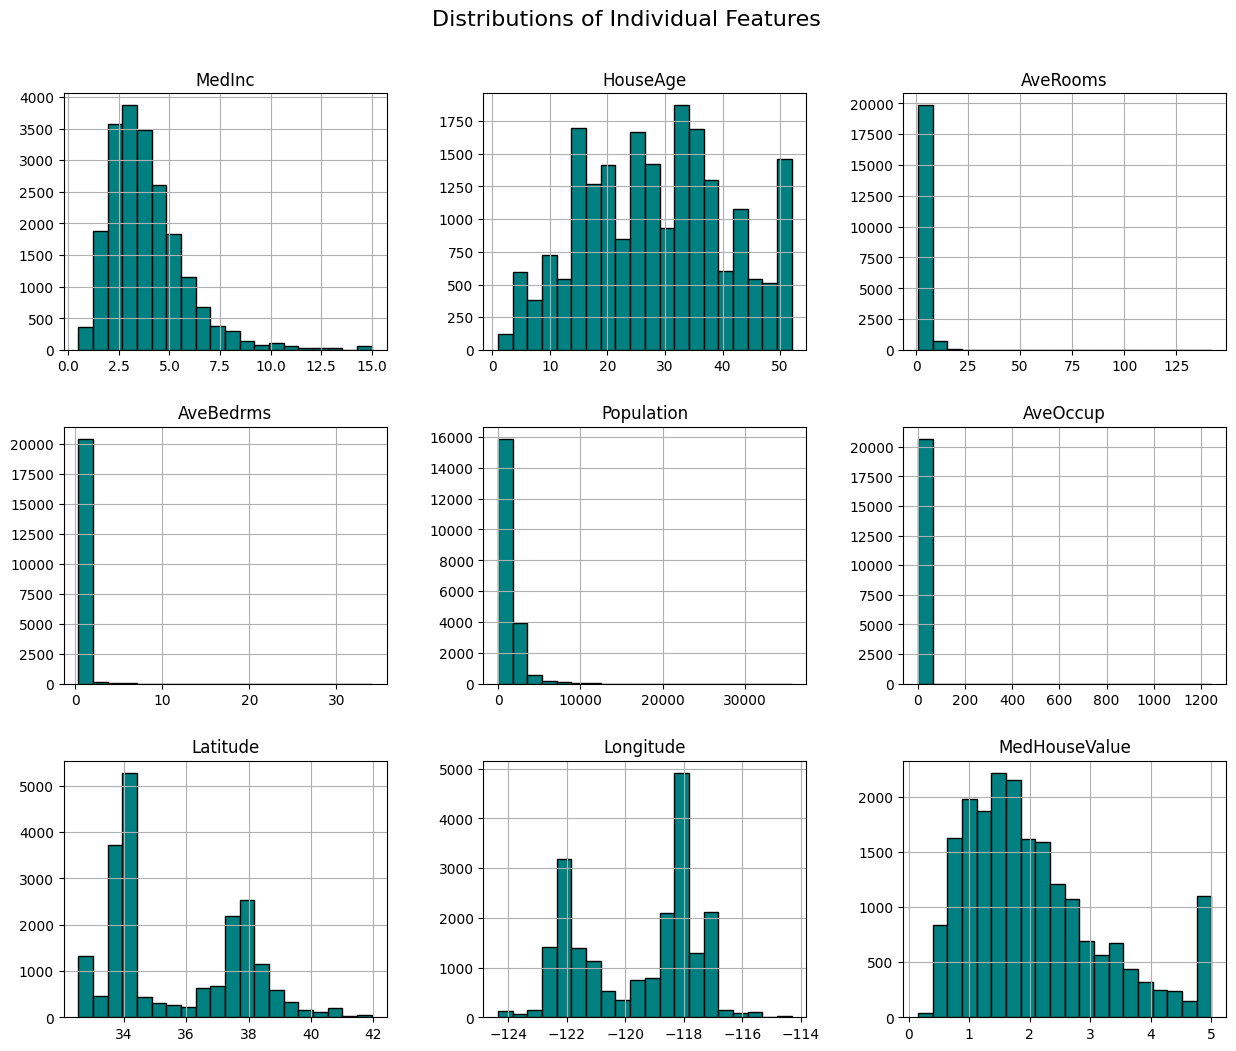

In [274]:
# Visualizations prior to outlier removal.
data.hist(figsize=(15, 12), bins=20, color="teal", edgecolor="black")

plt.suptitle("Distributions of Individual Features", fontsize=16, y=0.95)
plt.show()

(19569, 9)


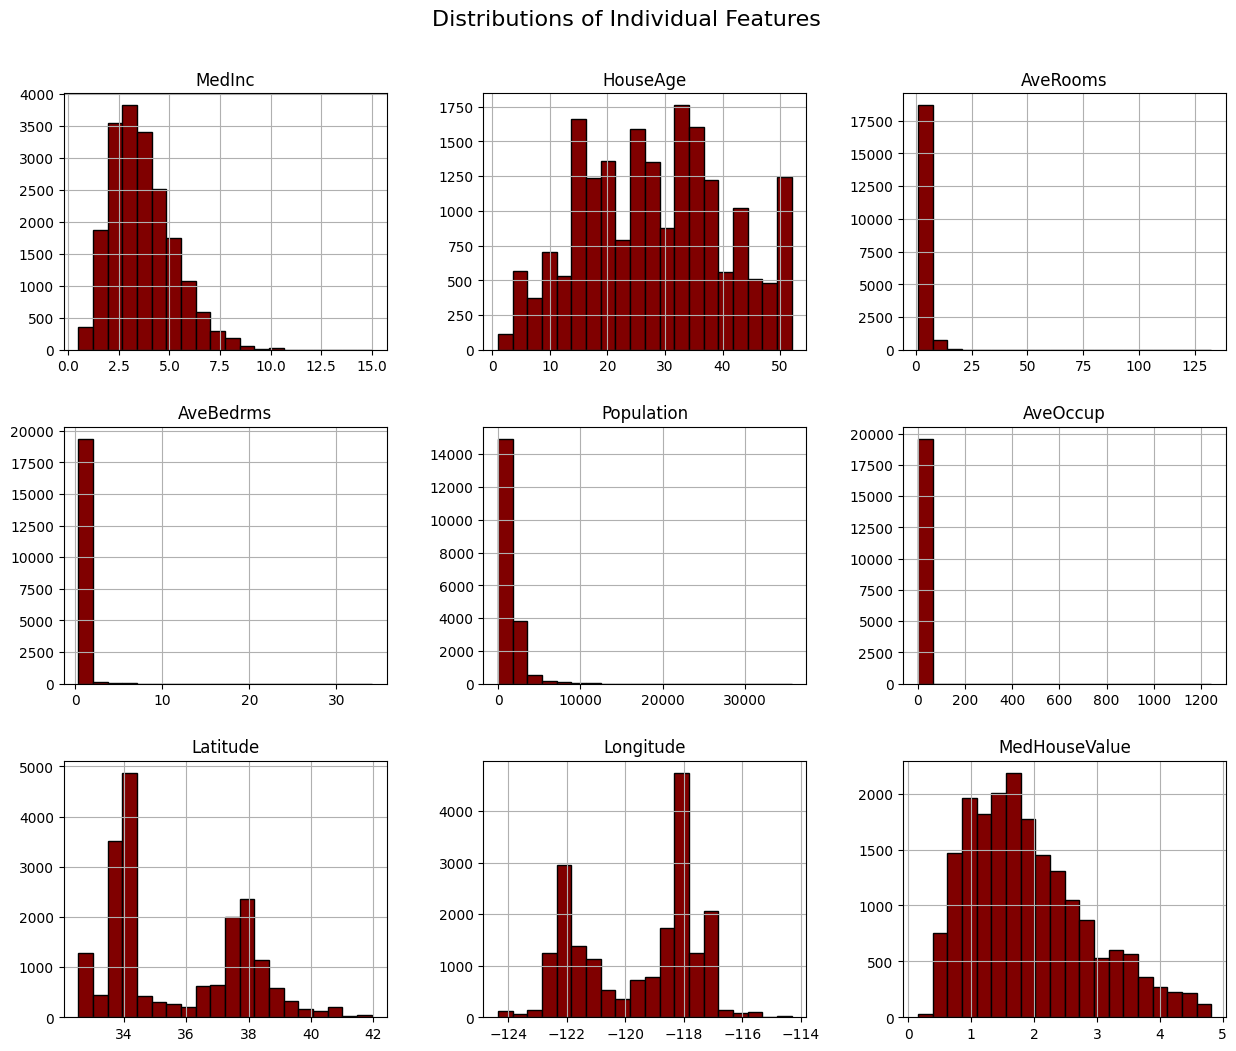

In [275]:
# Visualizations after outlier removal through Statistical Outlier Detection

data_IQR.hist(figsize=(15, 12), bins=20, color="maroon", edgecolor="black")

print(data_IQR.shape)
plt.suptitle("Distributions of Individual Features", fontsize=16, y=0.95)
plt.show()

(19629, 9)


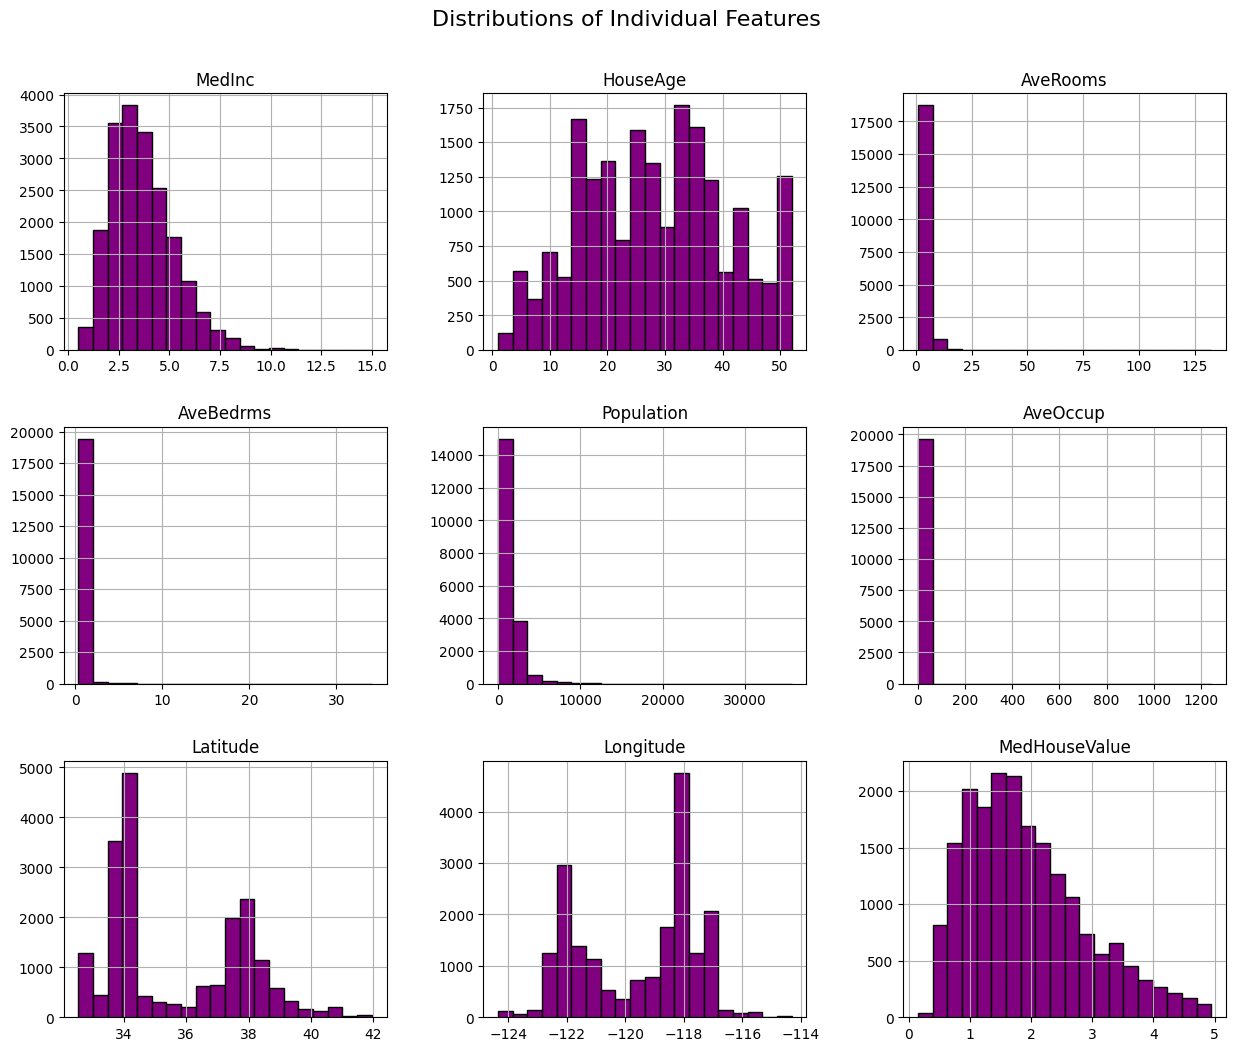

In [276]:
# Visualizations after outlier removal through Z-Score Outlier Detection

data_zscore.hist(figsize=(15, 12), bins=20, color="purple", edgecolor="black")

print(data_zscore.shape)
plt.suptitle("Distributions of Individual Features", fontsize=16, y=0.95)
plt.show()

In [277]:
data_IQR.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000
mean,3.665568,28.352752,5.357548,1.096695,1442.788952,3.098760,35.654159,-119.562786,1.908523
std,1.557927,12.497772,2.294996,0.452836,1145.011369,10.660526,2.151007,2.005764,0.954386
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.522700,18.000000,4.413567,1.005894,797.000000,2.448193,33.930000,-121.760000,1.162000
50%,3.441200,28.000000,5.181818,1.048588,1181.000000,2.839009,34.270000,-118.510000,1.732000
75%,4.572100,37.000000,5.965142,1.099363,1749.000000,3.307692,37.730000,-117.990000,2.467000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-114.310000,4.822000


In [278]:
data_zscore.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,19629.000000,19629.000000,19629.000000,19629.000000,19629.000000,19629.000000,19629.000000,19629.000000,19629.000000
mean,3.673515,28.370880,5.360322,1.096608,1441.713485,3.097243,35.652468,-119.562516,1.917602
std,1.567385,12.505597,2.293408,0.452280,1144.477194,10.644311,2.150340,2.005814,0.966933
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.525900,18.000000,4.416357,1.005882,796.000000,2.447059,33.930000,-121.760000,1.164000
50%,3.446400,28.000000,5.184569,1.048565,1180.000000,2.838202,34.270000,-118.500000,1.734000
75%,4.578700,37.000000,5.968254,1.099222,1747.000000,3.306452,37.730000,-117.990000,2.476000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-114.310000,4.947000


### Interpretation

Income Categories:
- Low (Price > 25%): Below 119,600.
- Average (25% <= Price <= 75%): Between 119,600 and 264,725.
- High (Price > 75%): Above 264,725.
- House Value: minimum = 14,999 and maximum = 500,000
- Detected Outliers: 10,316

Statistical Outlier Detection:
- Reduced dataset size by 1071 rows
- House Value: minimum = 14,999 and maximum = 482,200.
- New Income Categories:
    - Low (Price > 25%): Below 116,200
    - Average (25% <= Price <= 75%): Between 116,200 and 246,700
    - High (Price > 75%): Above 246,700

Z-Score Outlier Detection:
- Reduced dataset by 1011 rows.
- House Value: minimum =  14,999 and maximum is 494,700
- New Income Categories:
- Low (Price > 25%): Below 116,400.
- Average (25% <= Price <= 75%): Between 116,400 and 249,470
- High (Price > 75%): Above 264,725.

Statistical Outlier Detection is the best-suited method for outlier detection and removal. The Z-Score method relies on means and standard deviations across columns, which are influenced by outliers. The Statistical method uses an approach similar to the one used in 1.2.A, using quartiles to detect outliers. This method compares values against other values in the set, removing a higher number of outliers. Additionally, while there is a minimal difference in the graphs, there is a greater impact on the median house value histogram for the statistical approach.

In [279]:
# Apply Statistical Outlier Detection and Removal to dataset.
data = data_IQR

# To avoid data error messages.
data = data.copy()

## 2.3 Feature Engineering

In [280]:
# Ratio Features

data["Rooms_Per_Household"]= data["AveRooms"] / data["AveOccup"]
data["Bedrooms_Per_Room"]= data["AveBedrms"] / data["AveRooms"]
data["Population_Per_Household"]= data["Population"] / data["AveOccup"]
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue,Rooms_Per_Household,Bedrooms_Per_Room,Population_Per_Household
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.732919,0.146591,126.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.956685,0.155797,1138.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.957661,0.129516,177.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.283154,0.184458,219.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.879646,0.172096,259.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1.970414,0.224625,330.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,1.957865,0.215208,114.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,2.238332,0.215173,433.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,2.510121,0.219892,349.0


In [281]:
# Geographic Features

# Distance from Los Angeles
data["Lat_From_LA"] = abs(data["Latitude"] - 34.0522)
data["Lon_From_LA"] = abs(data["Longitude"] - -118.2437)

# Distance from San Francisco
data["Lat_From_SF"] = abs(data["Latitude"] - 37.7749)
data["Lon_From_SF"] = abs(data["Longitude"] - -122.4194)

# Return true (1) or false (0) for coast proximity.
data["Coastal_Proximity"] = (data["Longitude"] > -121).astype(int)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue,Rooms_Per_Household,Bedrooms_Per_Room,Population_Per_Household,Lat_From_LA,Lon_From_LA,Lat_From_SF,Lon_From_SF,Coastal_Proximity
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.732919,0.146591,126.0,3.8278,3.9863,0.1051,0.1894,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.956685,0.155797,1138.0,3.8078,3.9763,0.0851,0.1994,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.957661,0.129516,177.0,3.7978,3.9963,0.0751,0.1794,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.283154,0.184458,219.0,3.7978,4.0063,0.0751,0.1694,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.879646,0.172096,259.0,3.7978,4.0063,0.0751,0.1694,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1.970414,0.224625,330.0,5.4278,2.8463,1.7051,1.3294,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,1.957865,0.215208,114.0,5.4378,2.9663,1.7151,1.2094,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,2.238332,0.215173,433.0,5.3778,2.9763,1.6551,1.1994,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,2.510121,0.219892,349.0,5.3778,3.0763,1.6551,1.0994,0


In [282]:
# Categorical Features

# Create new colum for income category.
data["Income_Category"] = "" 

data.loc[(data["MedInc"] < 3), "Income_Category"] = "Low"
data.loc[(data["MedInc"] >= 3) & (data["MedInc"] < 6), "Income_Category"] = "Medium"
data.loc[(data["MedInc"] >= 6) & (data["MedInc"] < 9), "Income_Category"] = "High"
data.loc[(data["MedInc"] >= 9), "Income_Category"] = "Very High"

# Create new column for house age category.
data["House_Age_Category"] = ""

data.loc[(data["HouseAge"] < 10), "House_Age_Category"] = "New"
data.loc[(data["HouseAge"] >= 10) & (data["HouseAge"] < 30), "House_Age_Category"] = "Medium"
data.loc[(data["HouseAge"] >= 30), "House_Age_Category"] = "Old"

data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue,Rooms_Per_Household,Bedrooms_Per_Room,Population_Per_Household,Lat_From_LA,Lon_From_LA,Lat_From_SF,Lon_From_SF,Coastal_Proximity,Income_Category,House_Age_Category
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.732919,0.146591,126.0,3.8278,3.9863,0.1051,0.1894,0,High,Old
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.956685,0.155797,1138.0,3.8078,3.9763,0.0851,0.1994,0,High,Medium
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.957661,0.129516,177.0,3.7978,3.9963,0.0751,0.1794,0,High,Old
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.283154,0.184458,219.0,3.7978,4.0063,0.0751,0.1694,0,Medium,Old
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.879646,0.172096,259.0,3.7978,4.0063,0.0751,0.1694,0,Medium,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1.970414,0.224625,330.0,5.4278,2.8463,1.7051,1.3294,0,Low,Medium
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,1.957865,0.215208,114.0,5.4378,2.9663,1.7151,1.2094,0,Low,Medium
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,2.238332,0.215173,433.0,5.3778,2.9763,1.6551,1.1994,0,Low,Medium
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,2.510121,0.219892,349.0,5.3778,3.0763,1.6551,1.0994,0,Low,Medium


# Part 3: Custom k-NN Implementation
## 3.1 Distance Metrics Implementation

In [283]:
#  Euclidean Formula: Square root of ((x - x )² + (y - y )²)
def euclidean_distance(point1, point2):
    distance = 0.0

    # Ensure numeric values for point 1 and point 2.
    point1 = np.asarray(point1, dtype=float)
    point2 = np.asarray(point2, dtype=float)

    # loop ((x - x )² + (y - y )²) 
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2

    # Return square root of distance
    return distance ** 0.5


# Manhattan Formula: |x1 - x2| + |y1 - y2|
def manhattan_distance(point1, point2):
    distance = 0.0

    # Ensure numeric values for point 1 and point 2.
    point1 = np.asarray(point1, dtype=float)
    point2 = np.asarray(point2, dtype=float)
    
    # loop |x1 - x2| + |y1 - y2|
    for i in range(len(point1)):
        distance += abs(point1[i] - point2[i])

    return distance

# Minkowski Formula: (|x1 - x2|^p + |y1 - y2|^p)^(1/p)
def minkowski_distance(point1, point2, p=2):
    distance = 0.0

    # Ensure numeric values for point 1 and point 2.
    point1 = np.asarray(point1, dtype=float)
    point2 = np.asarray(point2, dtype=float)

    # loop |x1 - x2|^p + |y1 - y2|^p
    for i in range(len(point1)):
        distance += abs(point1[i] - point2[i]) ** p

    # Return  distance^(1/p)
    return distance ** (1/p)

## 3.2 k-NN Class Implementation

In [284]:
class CustomKNN:
    def __init__(self, k=5, distance_metric='euclidean', weights='uniform'):
        # Custom K-NN implementation
        self.k = int(k)
        self.distance_metric = distance_metric.lower()
        self.weights = str(weights).strip().lower()

        # Error Handling: weights must be uniform or distance.
        if self.weights not in ("uniform", "distance"):
            raise ValueError(f"weights must be 'uniform' or 'distance', got {repr(self.weights)}")
        self.X_train = None
        self.y_train = None
        #  Minkowski p = 2
        self.p = 2

    def fit(self, X, y):
        # Store training data
        self.X_train = np.asarray(X, dtype=float)
        # Store labels in a 1D array
        self.y_train = np.asarray(y, dtype=float).reshape(-1)

        # Error Handling: each row of X must have a label in y
        if self.X_train.shape[0] != self.y_train.shape[0]:
            raise ValueError("X and y must have the same number of samples.")

        return self

    # Copy distance formulas from 3.1.
    def _euclidean_distance(self, point1, point2):
        s = 0.0
        for i in range(len(point1)):
            s += (point1[i] - point2[i]) ** 2
        return s ** 0.5

    def _manhattan_distance(self, point1, point2):
        s = 0.0
        for i in range(len(point1)):
            s += abs(point1[i] - point2[i])
        return s

    def _minkowski_distance(self, point1, point2, p=2):
        s = 0.0
        for i in range(len(point1)):
            s += abs(point1[i] - point2[i]) ** p
        return s ** (1/p)

    def _calculate_distance(self, point1, point2):

        # Error Handling: the length of both points must be the same. 
        if len(point1)  != len(point2):
            raise ValueError("Point1 and Point2 must have the same length.")

        # Assigns inputted distance metrics to metric.
        # Error Handling: distance metric input must be in lowercase.
        metric = self.distance_metric.lower()

        if metric == "euclidean":
            return self._euclidean_distance(point1, point2)

        elif metric == "manhattan":
            return self._manhattan_distance(point1, point2)

        elif metric == "minkowski":

            # Enables input of other p values and default to p = 2 in case of no input.
            p = getattr(self, "p", 2)
            return self._minkowski_distance(point1, point2, p=p)

        # Error Handling: distance_metric must equal defined metrics.
        else:
            raise ValueError("Distance_metric must be 'euclidean', 'manhattan', or 'minkowski'.")

    def _get_neighbors(self, test_point):

        # Error Handling: training data must be stored.
        if self.X_train is None or self.y_train is None:
            raise RuntimeError("Call fit(X, y) before _get_neighbors().")

        # Convert test_point into numeric feature.
        tp = np.asarray(test_point, dtype=float).ravel()

        # Error Handling: feature count must match.
        if tp.shape[0] != self.X_train.shape[1]:
            raise ValueError("Feature count must match between training data and test point.")

        # Compute distance between test point and training row. 
        # Dists = (distance, row index).
        dists = [(self._calculate_distance(tp, x), idx) for idx, 
                 x in enumerate(self.X_train)]

        # Sort list according to nearest neighbors or distance.
        dists.sort(key = lambda t: t[0])

        # Extract indices (idx).
        # Error Handling: requested neighbors must equal count of training points.
        return [idx for (_, idx) in dists[:min(self.k, len(dists))]]

    def predict_single(self, test_point):

        # Error Handling: training data must be stored. 
        if self.X_train is None or self.y_train is None:
            raise RuntimeError("Call fit(X, y) before predict_single().")

        # Convert test_point into numeric feature.
        tp = np.asarray(test_point, dtype=float).ravel()

        # Error Handling: feature count must match.
        if tp.shape[0] != self.X_train.shape[1]:
            raise ValueError("Feature count must match between training data and test point.")

        # Get neighbor indices.
        neighbor_indices = self._get_neighbors(tp)
        # Target neighbors.
        neighbor_targets = self.y_train[neighbor_indices]

        if self.weights == "uniform":
            # Simple average of neighbor targets.
            return float(np.mean(neighbor_targets))

        elif self.weights == "distance":
            # Recalculate distances for the selected neighbors.
            dists = np.array([self._calculate_distance(tp, self.X_train[i]) 
                              for i in neighbor_indices], dtype=float)
            
            # Error Handling: check for distances <= 0.
            eps = 1e-12
            zero_mask = dists < eps
            if np.any(zero_mask):
                # Return average of neighbors' targets in case of distance <= 0.
                return float(np.mean(neighbor_targets[zero_mask]))

            # Error Handling: ensure there is no division by zero.
            weights = 1.0 / (dists + eps)

            # Calculate weighted average
            # Weighted Average = (Neighbor's Target * Weight) / Total Weights
            return float(np.sum(weights * neighbor_targets) / np.sum(weights))


        # Error Handling: ensure predictions are uniform or distance-weighted. 
        else:
            raise ValueError("Weights must be 'uniform' or 'distance'.")

    def predict(self, X_test):
        # Error Handling: training data must be stored. 
        if self.X_train is None or self.y_train is None:
            raise RuntimeError("Call fit(X, y) before predict().")

        # Error Handling: all values must be numeric.
        X_test = np.asarray(X_test, dtype=float)

        # Convert X_test into 2D array.
        if X_test.ndim == 1:
            X_test = X_test.reshape(1, -1)

        # Error Handling: feature count must match.
        if X_test.shape[1] != self.X_train.shape[1]:
            raise ValueError("Feature count must match training data.")

        # Assign array to hold predictions.
        preds = np.empty(X_test.shape[0], dtype=float)

        # Loops predict_single for all rows in X_test.
        for i in range(X_test.shape[0]):
            preds[i] = self.predict_single(X_test[i])

        return preds

    def score(self, X_test, y_test):
        # Error Handling: training data must be stored. 
        if self.X_train is None or self.y_train is None:
            raise RuntimeError("Call fit(X, y) before score().")

        # Error Handling: all values must be numeric.
        X_test = np.asarray(X_test, dtype=float)
        y_test = np.asarray(y_test, dtype=float).reshape(-1)

        # R-Square = 1 - (Residual Sum of Squares / Total Sum of Squares)
        y_pred = self.predict(X_test)
        # Residual Sum of Squares: ((True Y - Predicted Y)^2)
        ss_residual = np.sum((y_test - y_pred) ** 2)
        # True Sum of Squares: (True Y - Mean of True Y)^2)
        ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
        
        # Error Handling: return zero is all y_test values are the same.
        if ss_total == 0:
            return 0.0

        return 1 - ss_residual / ss_total

# Part 4: Manual Calculations (Proof of Understanding)
## 4.1 Distance Calculations

In [285]:
# Get points 1, 2, & 3.
p1 = data.loc[3, ["MedInc", "MedHouseValue"]]
p2 = data.loc[30, ["MedInc", "MedHouseValue"]]
p3 = data.loc[300, ["MedInc", "MedHouseValue"]]

# Calculate using defined functions.
euc = euclidean_distance(p1, p2)
man = manhattan_distance(p1, p3)
min = minkowski_distance(p2, p3, p=3)

# Verify manual calculations through implemented functions.
if np.round(euc, 4) == 4.3131:
    print("Euclidean distance is verified.")
else: 
    print("Error in Euclidean distance verification.") 

if np.round(man, 4) == 6.2132:
    print("Manhattan distance is verified.")
else: 
    print("Error in Manhattan distance verification.")

if np.round(min, 3) == 0.328:
    print("Minkowski distance is verified.")
else: 
    print("Error in Minkowski distance verification.")

Euclidean distance is verified.
Manhattan distance is verified.
Minkowski distance is verified.


## 4.2 k-NN Prediction Walkthrough

### Manual Neighbor Finding:

In [286]:
# Ensure all colums are numeric.
neighbor_data = data.select_dtypes(include=['number'])

# Drop target variable and Coastal_Proximity column.
neighbor_data = neighbor_data.drop("MedHouseValue", axis=1)
neighbor_data = neighbor_data.drop("Coastal_Proximity", axis=1)

targets = data["MedHouseValue"]

# Select data.loc[0] as test point.
testpoint = neighbor_data.loc[0]
testtarget = targets.loc[0]
print("Test Point: [",round(testpoint.iloc[0], 3), ",",round(testpoint.iloc[1], 3), ",",round(testpoint.iloc[2], 3), ",",round(testpoint.iloc[3], 3), ",",round(testpoint.iloc[4], 3), ",",round(testpoint.iloc[5], 3), ",",round(testpoint.iloc[6], 3), ",",round(testpoint.iloc[7], 3), ",",round(testpoint.iloc[8], 3), ",",round(testpoint.iloc[9], 3), ",",round(testpoint.iloc[10], 3), ",",round(testpoint.iloc[11], 3), ",",round(testpoint.iloc[12], 3), ",",round(testpoint.iloc[13], 3), ",",round(testpoint.iloc[14], 3), "]")

print("    ")
print("Distance Calculations")
print("    ")

# Manually find neighbors across first ten rows.
for t in range(1, 11):
    dist = 0

    # Select training point.
    trainpoint = neighbor_data.loc[t]
    traintarget = targets.loc[t]
    print("Point", t, ": [", round(trainpoint.iloc[0], 3), ",",round(trainpoint.iloc[1], 3), ",",round(trainpoint.iloc[2], 3), ",",round(trainpoint.iloc[3], 3), ",",round(trainpoint.iloc[4], 3), ",",round(trainpoint.iloc[5], 3), ",",round(trainpoint.iloc[6], 3), ",",round(trainpoint.iloc[7], 3), ",",round(trainpoint.iloc[8], 3), ",",round(trainpoint.iloc[9], 3), ",",round(trainpoint.iloc[10], 3), ",",round(trainpoint.iloc[11], 3), ",",round(trainpoint.iloc[12], 3), ",",round(trainpoint.iloc[13], 3), ",",round(trainpoint.iloc[14], 3), "]")
    
    # Formula: √[(x1-x2)² + (y1-y2)² + (z1-z2)²... = X.XX
    for index in range(15):
            # Calculate (x1-x2)² for each feature.
            diff = testpoint.iloc[index] - trainpoint.iloc[index]
            diff = diff ** 2
            # Add (x1-x2)² + (y1-y2)² + (z1-z2)² + ...
            dist += diff 

    # Display calculations for each training point.
    print("    ")
    print("Distance = √[(", round(testpoint.iloc[0], 3), "-", round(trainpoint.iloc[0], 3), ")² +", " (", round(testpoint.iloc[1], 3), "-", round(trainpoint.iloc[1], 3), ")² +", " (", round(testpoint.iloc[2], 3), "-", round(trainpoint.iloc[2], 3), ")² + (",round(testpoint.iloc[3], 3), "-", round(trainpoint.iloc[3], 3), ")² + (",round(testpoint.iloc[4], 3), "-", round(trainpoint.iloc[4], 3), ")² + (",round(testpoint.iloc[5], 3), "-", round(trainpoint.iloc[5], 3), ")² + (",round(testpoint.iloc[6], 3), "-", round(trainpoint.iloc[6], 3), ")² + (",round(testpoint.iloc[7], 3), "-", round(trainpoint.iloc[7], 3), ")² + (",round(testpoint.iloc[8], 3), "-", round(trainpoint.iloc[8], 3), ")² + (",round(testpoint.iloc[9], 3), "-", round(trainpoint.iloc[9], 3), ")² + (",round(testpoint.iloc[10], 3), "-", round(trainpoint.iloc[10], 3), ")² + (",round(testpoint.iloc[11], 3), "-", round(trainpoint.iloc[11], 3), ")² + (",round(testpoint.iloc[12], 3), "-", round(trainpoint.iloc[12], 3), ")² + (",round(testpoint.iloc[13], 3), "-", round(trainpoint.iloc[13], 3), ")² + (",round(testpoint.iloc[14], 3), "-", round(trainpoint.iloc[14], 3), ")² ]")
    print("= √(", np.round(dist, 3), ") =", np.round(np.sqrt(dist), 3))
    print("    ")

# Manual Ranking Process to identify 5 nearest neighbors.
# Test Point: Target Variable: 4.526
# Point 1 ( 2312.312 , 3.585 ) 
# Point 2 ( 181.662 , 3.521 )
# Point 3 ( 253.919 , 3.413 )
# Point 4 ( 277.272 , 3.422 )
# Point 5 ( 113.643 , 2.697 )
# Point 6 ( 864.104 , 2.992 )
# Point 7 ( 984.286 , 2.414 )
# Point 8 ( 1000.732 , 2.267 )
# Point 9 ( 1362.473 , 2.611 )
# Point 10 ( 649.669 , 2.815 )
# Sorted by Distance: 5, 2, 3, 4, 10, 6, 7, 8, 9, 1

print("   ")
print("5 Nearest Neighbors:")
print("   ")
print("1. Point Index: 5, Distance: 113.643, Target: 2.697")
print("2. Point Index: 2, Distance: 181.662, Target: 3.521")
print("3. Point Index: 3, Distance: 253.919, Target: 3.413")
print("4. Point Index: 4, Distance: 277.272, Target: 3.422")
print("5. Point Index: 10, Distance: 649.669, Target: 2.815")
print("   ")

Test Point: [ 8.325 , 41.0 , 6.984 , 1.024 , 322.0 , 2.556 , 37.88 , -122.23 , 2.733 , 0.147 , 126.0 , 3.828 , 3.986 , 0.105 , 0.189 ]
    
Distance Calculations
    
Point 1 : [ 8.301 , 21.0 , 6.238 , 0.972 , 2401.0 , 2.11 , 37.86 , -122.22 , 2.957 , 0.156 , 1138.0 , 3.808 , 3.976 , 0.085 , 0.199 ]
    
Distance = √[( 8.325 - 8.301 )² +  ( 41.0 - 21.0 )² +  ( 6.984 - 6.238 )² + ( 1.024 - 0.972 )² + ( 322.0 - 2401.0 )² + ( 2.556 - 2.11 )² + ( 37.88 - 37.86 )² + ( -122.23 - -122.22 )² + ( 2.733 - 2.957 )² + ( 0.147 - 0.156 )² + ( 126.0 - 1138.0 )² + ( 3.828 - 3.808 )² + ( 3.986 - 3.976 )² + ( 0.105 - 0.085 )² + ( 0.189 - 0.199 )² ]
= √( 5346785.81 ) = 2312.312
    
Point 2 : [ 7.257 , 52.0 , 8.288 , 1.073 , 496.0 , 2.802 , 37.85 , -122.24 , 2.958 , 0.13 , 177.0 , 3.798 , 3.996 , 0.075 , 0.179 ]
    
Distance = √[( 8.325 - 7.257 )² +  ( 41.0 - 52.0 )² +  ( 6.984 - 8.288 )² + ( 1.024 - 1.073 )² + ( 322.0 - 496.0 )² + ( 2.556 - 2.802 )² + ( 37.88 - 37.85 )² + ( -122.23 - -122.24 )² + ( 2.7

### Prediction Calculation:

In [288]:
# Store row indexes, distances, target variables.
distances = []

# Calculate distances across all training points. 
for row in range(1, 19568):
    trainpoint = neighbor_data.iloc[row]
    traintarget = targets.iloc[row]
    dist = 0
    for index in range(15):
        diff = testpoint.iloc[index] - trainpoint.iloc[index]
        diff = diff ** 2
        dist += diff 
    distances.append((row, np.round(np.sqrt(dist),3), traintarget))

# Manually finding nearest 5 neighbors across all training points.
# Distance < 5: No results.
list(filter(lambda t: t[1] < 5, distances))
# Distance < 10: Two results.
list(filter(lambda t: t[1] < 10, distances))
# Distance < 15: Eight results.
list(filter(lambda t: t[1] < 15, distances))

# Ranking Process: rank based on distance.
print("   ")
print("5 Nearest Neighbors Across All Training Points:")
print("   ")
print("1. Point Index: 1515, Distance: 5.918, Target: 2.633")
print("2. Point Index: 16959, Distance: 8.524, Target: 2.083")
print("3. Point Index: 15755, Distance: 10.53, Target: 1.525")
print("4. Point Index: 25, Distance: 10.788, Target: 1.075")
print("5. Point Index: 798, Distance: 12.709, Target: 2.042")
print("   ")

   
5 Nearest Neighbors Across All Training Points:
   
1. Point Index: 1515, Distance: 5.918, Target: 2.633
2. Point Index: 16959, Distance: 8.524, Target: 2.083
3. Point Index: 15755, Distance: 10.53, Target: 1.525
4. Point Index: 25, Distance: 10.788, Target: 1.075
5. Point Index: 798, Distance: 12.709, Target: 2.042
   


In [289]:
# Uniform Weighted Prediction:

u_pred = (2.633 + 2.083 + 1.525 + 1.075 + 2.042) / 5
print("Uniform Prediction: (2.633 + 2.083 + 1.525 + 1.075 + 2.042) / 5 =", np.round(u_pred, 3))
print("   ")

# Distance-Weighted Prediction: 
print("Distance-Weighted Prediction: (wi * y1) / wi: ")
print("   ")
print("Compute Weights & Weighted Targets:")
print("1. Weight: 1/5.918 = ", np.round(1/5.918, 3))
print("1. Weighted Target: 2.633 * 0.169 = ", np.round(2.633 * 0.169, 3))
print("2. Weight: 1/8.524 = ", np.round(1/8.524, 3))
print("2. Weighted Target: 2.083 * 0.117 = ", np.round(2.083 * 0.117, 3))
print("3. Weight: 1/10.53 = ", np.round(1/10.53, 3))
print("3. Weighted Target: 1.525 * 0.095 = ", np.round(1.525 * 0.095, 3))
print("4. Weight: 1/10.788 = ", np.round(1/10.788, 3))
print("4. Weighted Target: 1.075 * 0.093 = ", np.round(1.075 * 0.093, 3))
print("5. Weight: 1/12.709 = ", np.round(1/12.709, 3))
print("4. Weighted Target: 2.042 * 0.079 = ", np.round(2.042 * 0.079, 3))
print("   ")
print("wi * yi = 0.445 + 0.244 + 0.145 + 0.1 + 0.161 = ", np.round(0.445 + 0.244 + 0.145 + 0.1 + 0.161, 3))
print("wi = 0.169 + 0.117 + 0.095 + 0.093 + 0.079 = ", np.round(0.169 + 0.117 + 0.095 + 0.093 + 0.079, 3))
print("(wi * y1) / wi: = 1.095 / 0.553 =", np.round(1.095 / 0.553, 3))


Uniform Prediction: (2.633 + 2.083 + 1.525 + 1.075 + 2.042) / 5 = 1.872
   
Distance-Weighted Prediction: (wi * y1) / wi: 
   
Compute Weights & Weighted Targets:
1. Weight: 1/5.918 =  0.169
1. Weighted Target: 2.633 * 0.169 =  0.445
2. Weight: 1/8.524 =  0.117
2. Weighted Target: 2.083 * 0.117 =  0.244
3. Weight: 1/10.53 =  0.095
3. Weighted Target: 1.525 * 0.095 =  0.145
4. Weight: 1/10.788 =  0.093
4. Weighted Target: 1.075 * 0.093 =  0.1
5. Weight: 1/12.709 =  0.079
4. Weighted Target: 2.042 * 0.079 =  0.161
   
wi * yi = 0.445 + 0.244 + 0.145 + 0.1 + 0.161 =  1.095
wi = 0.169 + 0.117 + 0.095 + 0.093 + 0.079 =  0.553
(wi * y1) / wi: = 1.095 / 0.553 = 1.98


# Part 5: Model Evaluation and Hyperparameter Tuning
## 5.1 Train-Test Split and Scaling

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assign feature variables to X.
X = data.drop(columns=["MedHouseValue"])
# Assign target variables to y.
y = data["MedHouseValue"]

# Split dataset 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seperate numerical and categorical columns. 
numbers = X.select_dtypes(include=["number"]).columns.tolist()
categories = X.select_dtypes(include=["object"]).columns.tolist()

# Apply StandardScaler + OneHotEncoder
# StandardScaler = (x - mean) / standard deviation
std_data = ColumnTransformer(transformers=[
        ("num", StandardScaler(), numbers),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categories)])

X_train_std = std_data.fit_transform(X_train)
X_test_std  = std_data.transform(X_test)
                             
# Apply MinMaxScaler + OneHotEncoder
# MinMaxScaler = (x - min) / (max - min)
mm_data = ColumnTransformer(transformers=[
        ("num", MinMaxScaler(), numbers),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categories)])

X_train_mm  = mm_data.fit_transform(X_train)
X_test_mm   = mm_data.transform(X_test)

# Apply RobustScaler + OneHotEncoder 
# RobustScaler = (x - median) / IQR
rb_data = ColumnTransformer(transformers=[
        ("num", RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0)), numbers),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categories),])

X_train_rb = rb_data.fit_transform(X_train)
X_test_rb  = rb_data.transform(X_test)

# Based on EDA findings, robust scaling is the best choice because skewed data and outliers are likley to influence results.
print("Original training sample:\n", X_train[numbers + categories].head(2))
print("StandardScaler sample:\n", X_train_std[:2])
print("MinMaxScaler sample:\n", X_train_mm[:2])
print("Robust sample:\n", X_train_rb[:2])

Original training sample:
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
5886   3.4286      44.0  4.136086   0.992355      1676.0  2.562691     34.16   
11920  2.7452      33.0  4.956427   1.021786      1691.0  3.684096     33.96   

       Longitude  Rooms_Per_Household  Bedrooms_Per_Room  \
5886     -118.33             1.613962           0.239926   
11920    -117.42             1.345358           0.206154   

       Population_Per_Household  Lat_From_LA  Lon_From_LA  Lat_From_SF  \
5886                      654.0       0.1078       0.0863       3.6149   
11920                     459.0       0.0922       0.8237       3.8149   

       Lon_From_SF  Coastal_Proximity Income_Category House_Age_Category  
5886        4.0894                  1          Medium                Old  
11920       4.9994                  1             Low                Old  
StandardScaler sample:
 [[-0.151   1.2479 -0.5215 -0.2205  0.2086 -0.0482 -0.699   0.6208 -0.2835
   0.

### 5.2 Hyperparameter Grid Search

In [292]:
from itertools import product
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
from sklearn.model_selection import KFold

def manual_grid_search(X_train, y_train, X_val, y_val, param_grid, cv_splits=5, random_state=42):

    # Map distance names to Minkowski p
    p_map = {"euclidean": 2, "manhattan": 1}

    X = np.asarray(X_train)
    y = np.asarray(y_train).ravel()

    # Split data into 5 parts.
    kf = KFold(n_splits=cv_splits, shuffle=True, random_state=random_state)
                   
    # Keys = ["n_neighbors", weights]
    keys = list(param_grid.keys())
    # Make all possible combinations of parameter values.
    combos = list(product(*[param_grid[k] for k in keys]))

    records = []

    # Loop over all parameter combinations:
    for combo in combos:
        params = dict(zip(keys, combo))

        # Extract parameters
        k = params["n_neighbors"]
        p = p_map[params["distance_metric"]]
        w = params['weights']

        train_rmse, val_rmse = [], []
        val_mae, val_r2 = [], []

        # Loop through each fold.
        for tr_idx, va_idx in kf.split(X):

            # Split into training and validation folds.
            Xtr, Xva = X[tr_idx], X[va_idx]
            ytr, yva = y[tr_idx], y[va_idx]
            
            # Create KNN model with chosen hyperparameters.
            model = KNeighborsRegressor(n_neighbors=k, p=p, weights=w)
            model.fit(Xtr, ytr)

            # Predict on training fold.
            ytr_hat = model.predict(Xtr)
            train_rmse.append(mean_squared_error(ytr, ytr_hat, squared=False))

            # Validate prediction.
            yva_hat = model.predict(Xva)
            val_rmse.append(mean_squared_error(yva, yva_hat, squared=False))
            val_mae.append(mean_absolute_error(yva, yva_hat))
            val_r2.append(r2_score(yva, yva_hat))

            # Save results across folds
            records.append({
            "k": k,
            "distance_metric": params["distance_metric"],
            "weights": w,
            "train_RMSE_mean": np.mean(train_rmse),
            "train_RMSE_std":  np.std(train_rmse),
            "val_RMSE_mean":   np.mean(val_rmse),
            "val_RMSE_std":    np.std(val_rmse),
            "val_MAE_mean":    np.mean(val_mae),
            "val_R2_mean":     np.mean(val_r2)})

         # Assigns DataFrame to results, sorted by best model first.
        results_data = pd.DataFrame(records).sort_values(["val_RMSE_mean", "train_RMSE_mean"]).reset_index(drop=True)

        # Pick the best parameters from top row.
        top = results_data.iloc[0]
        best_params = {"n_neighbors": int(top["k"]), "p": 2 if top["distance_metric"] == "euclidean" else 1,
                        "weights": top["weights"]}
            
    # Returns the best parameters and results.
    return best_params, results_data

In [293]:
# Define parameters:
param_grid = {"n_neighbors": [3, 5, 7, 9, 11, 15, 21], 
              "distance_metric": ['euclidean', 'manhattan'],
              "weights": ['uniform', 'distance']}

best_params, results_data = manual_grid_search(X_train_rb, y_train, None, None, 
                                               param_grid=param_grid, cv_splits = 5,
                                               random_state=42)

print("Best parameters from 5-fold CV:", best_params)
print(results_data.head(10))

Best parameters from 5-fold CV: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
    k distance_metric   weights  train_RMSE_mean  train_RMSE_std  \
0  11       manhattan  distance         0.000000        0.000000   
1   9       manhattan  distance         0.000000        0.000000   
2  15       manhattan  distance         0.000000        0.000000   
3  11       manhattan  distance         0.000000        0.000000   
4   9       manhattan  distance         0.000000        0.000000   
5  15       manhattan  distance         0.000000        0.000000   
6   7       manhattan  distance         0.000000        0.000000   
7  11       manhattan   uniform         0.486666        0.002126   
8  21       manhattan  distance         0.000000        0.000000   
9   9       manhattan   uniform         0.477121        0.002115   

   val_RMSE_mean  val_RMSE_std  val_MAE_mean  val_R2_mean  
0       0.530969      0.008457      0.378581     0.689186  
1       0.531525      0.008253      0.377685    

### 5.3 Performance Analysis

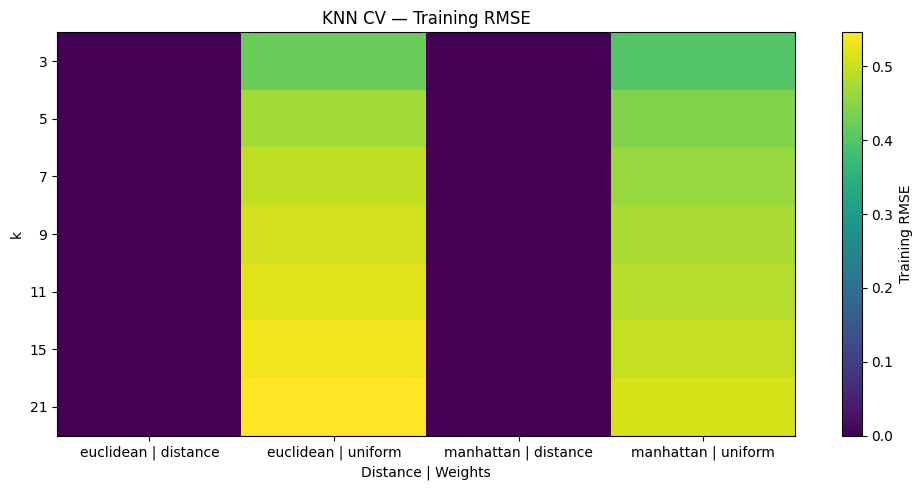

In [294]:
# Visualize Training Results:
results_data["combo"] = results_data["distance_metric"] + " | " + results_data["weights"]
train_mat = results_data.pivot_table(index="k", columns="combo", values="train_RMSE_mean", aggfunc="min").sort_index()

plt.figure(figsize=(10,5))
im = plt.imshow(train_mat.values, aspect="auto")
plt.xticks(np.arange(train_mat.shape[1]), train_mat.columns, rotation=0)
plt.yticks(np.arange(train_mat.shape[0]), train_mat.index)
plt.colorbar(im, label="Training RMSE")
plt.title("KNN CV — Training RMSE")
plt.xlabel("Distance | Weights"); plt.ylabel("k")
plt.tight_layout(); plt.show()

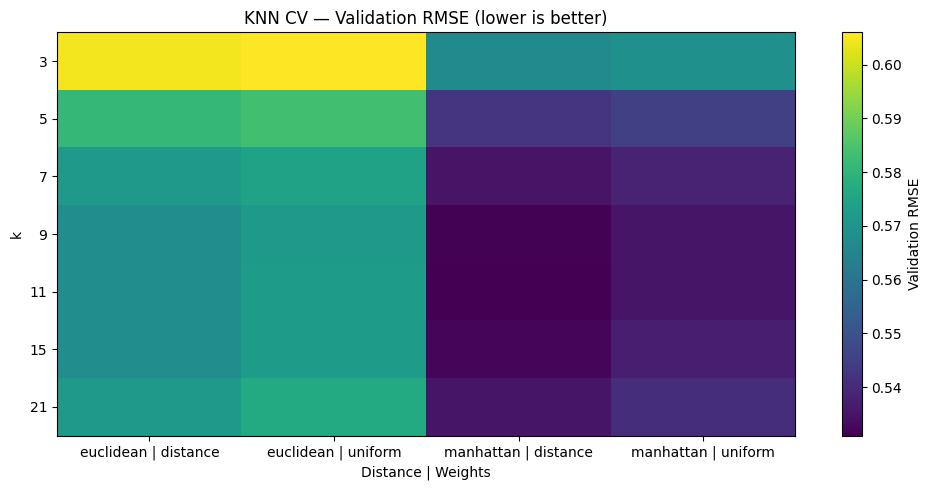

In [295]:
# Visualize Validation Results:
results_data["combo"] = results_data["distance_metric"] + " | " + results_data["weights"]
mat = results_data.pivot_table(index="k", columns="combo", values="val_RMSE_mean", aggfunc="min").sort_index()

plt.figure(figsize=(10,5))
im = plt.imshow(mat.values, aspect="auto")
plt.xticks(np.arange(mat.shape[1]), mat.columns, rotation=0)
plt.yticks(np.arange(mat.shape[0]), mat.index)
plt.colorbar(im, label="Validation RMSE")
plt.title("KNN CV — Validation RMSE (lower is better)")
plt.xlabel("Distance | Weights"); plt.ylabel("k")

plt.tight_layout(); plt.show()

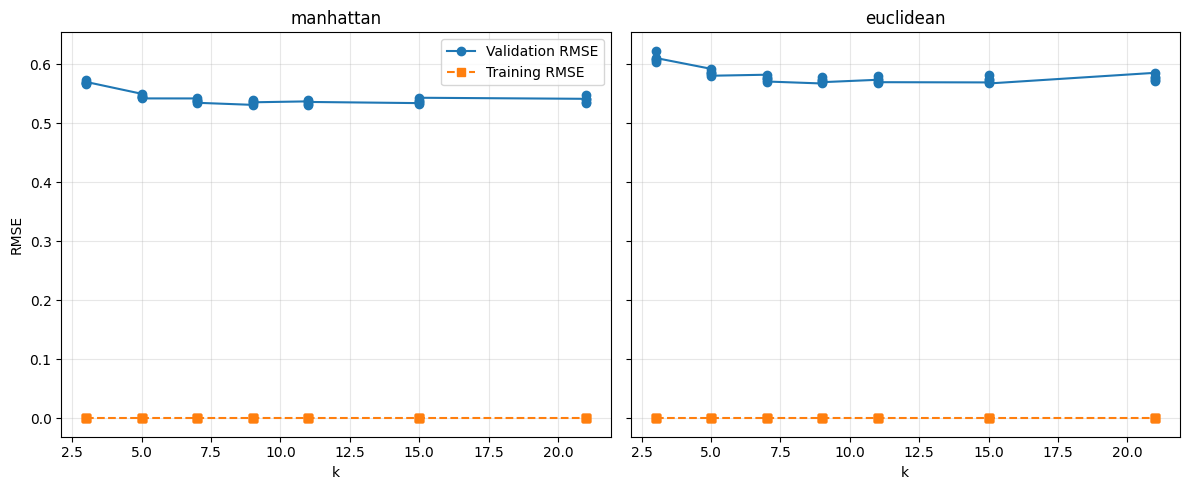

In [296]:
# Visualize results: Training Scores vs Validation Scores.
wname = best_params["weights"]  # keep weights fixed (e.g., 'distance')

fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)
for ax, dname in zip(axes, ["manhattan", "euclidean"]):
    sub = (results_data[(results_data["distance_metric"] == dname) &
                      (results_data["weights"] == wname)]
           .sort_values("k"))
    ax.plot(sub["k"], sub["val_RMSE_mean"], marker="o", label="Validation RMSE")
    ax.plot(sub["k"], sub["train_RMSE_mean"], linestyle="--", marker="s", label="Training RMSE")
    ax.set_title(dname)
    ax.set_xlabel("k")
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel("RMSE")
axes[0].legend()
plt.tight_layout()
plt.show()

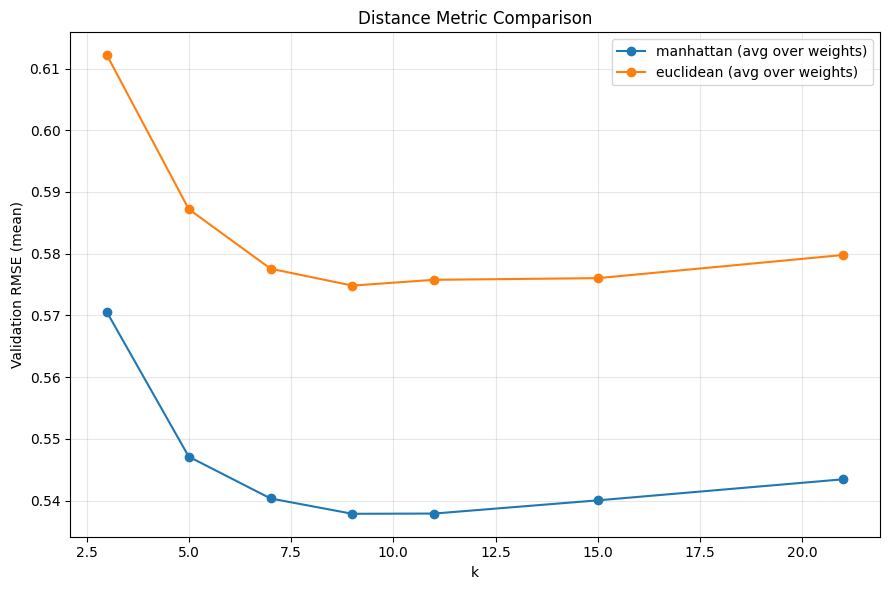

In [297]:
# Visualize results: Euclidean vs Manhattan metrics.
plt.figure(figsize=(9,6))
for d in results_data["distance_metric"].unique():
    sub = (results_data[results_data["distance_metric"]==d]
           .groupby("k", as_index=False)[["val_RMSE_mean"]].mean())
    plt.plot(sub["k"], sub["val_RMSE_mean"], marker="o", label=f"{d} (avg over weights)")
plt.xlabel("k"); plt.ylabel("Validation RMSE (mean)")
plt.title("Distance Metric Comparison"); plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout()
plt.show()

### 5.3 Evaluation:

The best parameter combination is 11 nearest neighbors, manhattan distance formula, and  distance-weighted predictions. The Manhattan metric tends to perform better than the Euclidean metric across all k values and weights. Both metrics performed the same on training data, when combined with distance weights. However, both models performed better using uniform weights on the test data, than they had on the training data. Additionally, increasing nearest neighbors hindered performance using uniform weights. In the validation set, 9 to 15 are the ideal k values. As the k values increase beyond that, the performance of both models decreases.

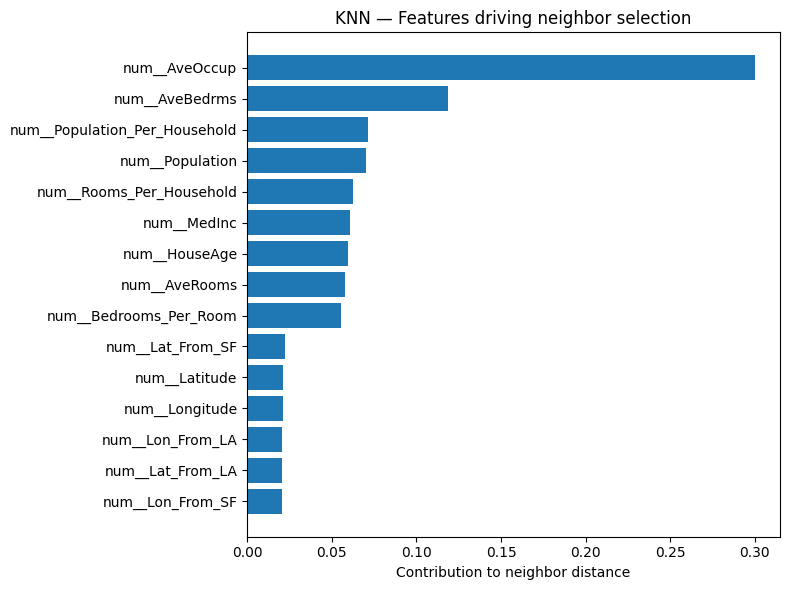

In [43]:
# Feature Importance Analysis:
from sklearn.pipeline import Pipeline
import builtins

# Fit a pipeline.
pipe = Pipeline([
    ("prep", rb_data),
    ("knn", KNeighborsRegressor(
        n_neighbors=best_params["n_neighbors"],
        p=best_params["p"],
        weights=best_params["weights"]))])

pipe.fit(X_train, y_train)

# Feature importance.
prep = pipe.named_steps["prep"]
knn  = pipe.named_steps["knn"]

# Get neighbors on training data.
Xtr_tf = prep.transform(X_train)
n_nb = builtins.min(knn.n_neighbors + 1, Xtr_tf.shape[0])
dists, inds = knn.kneighbors(Xtr_tf, n_neighbors=n_nb, return_distance=True)
dists, inds = dists[:, 1:], inds[:, 1:]

# Sample rows.
rng = np.random.RandomState(42)
m = builtins.min(800, Xtr_tf.shape[0])
rows = rng.choice(Xtr_tf.shape[0], size=m, replace=False)

# Importance per feature.
feat_sum = np.zeros(Xtr_tf.shape[1], dtype=float)
eps = 1e-12

# Loop over a sample of points.
for i in rows:
    Xi, nnI, nnD = Xtr_tf[i], inds[i], dists[i]
    # Distance = 1/distance
    if knn.weights == "distance":
        w = 1.0 / (nnD + eps)
    # Uniform = equal weight.
    else:
        w = np.ones_like(nnD)
    w = w / (w.sum() + eps)

    # Absolute difference per feature.
    diffs = np.abs(Xi - Xtr_tf[nnI])   

    # Difference per feature * weight
    feat_sum += (w[:, None] * diffs).sum(0)

# Importance per feature for neighbor selection.
shares = feat_sum / (feat_sum.sum() + eps)

# Get column names.
try:
    feat_names = prep.get_feature_names_out()
except AttributeError:
    feat_names = np.array([f"f{i}" for i in range(Xtr_tf.shape[1])])

# Label each value with feature name and contribution.
s = pd.Series(shares, index=feat_names).sort_values(ascending=False)
# Select Top 15 features.
top = s.head(15)

plt.figure(figsize=(8,6))
plt.barh(top.index[::-1], top.values[::-1])
plt.xlabel("Contribution to neighbor distance")
plt.title("KNN — Features driving neighbor selection")
plt.tight_layout(); plt.show()

### 5.3: Feature Importance Analysis:

This code calculated the contribution of each feature in neighbor selection. Based on this, average household contributes the greatest, while longitude from San Francisco contriutes the lowest. The differences in values are a key determinant of neighbor selection. These differences are likely to be greater in individual and house features, such as household size, median income, or population. For the calculated distances, it is likely that these values are smaller because they are produced by subtracting longitudes and latitudes.

Test RMSE: 0.5249
Test MAE : 0.3730
Test R^2 : 0.7021
Mean residual (bias): -0.0036


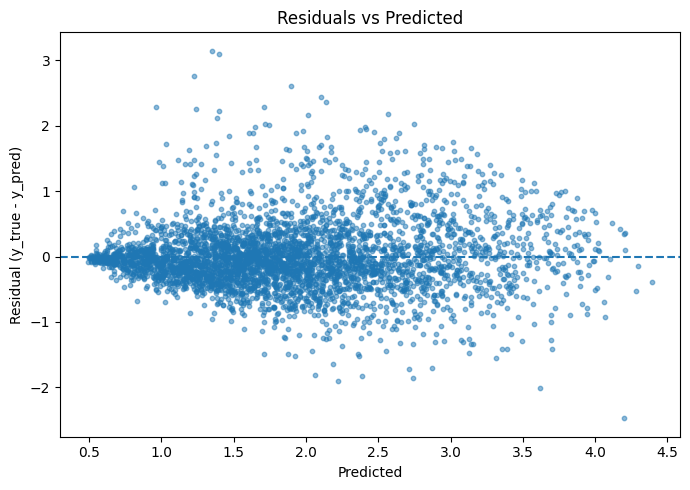

In [298]:
# Error Analysis:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicting on testing data.
y_pred = pipe.predict(X_test)
residual = y_test - y_pred
abs_residual = np.abs(residual)

# Defining metrics.
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
bias = residual.mean()
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE : {mae:.4f}")
print(f"Test R^2 : {r2:.4f}")
print(f"Mean residual (bias): {bias:.4f}")

# Assign DataFrame.
err_df = X_test.copy()
err_df["y_true"] = y_test.values
err_df["y_pred"] = y_pred
err_df["residual"] = residual
err_df["abs_residual"] = abs_residual


# Residual vs. Predicted:
plt.figure(figsize=(7,5))
plt.scatter(err_df["y_pred"], err_df["residual"], s=10, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residual (y_true - y_pred)")
plt.title("Residuals vs Predicted")
plt.tight_layout(); plt.show()


### 5.3 Error Analysis

The scoring metrics indicate a small difference between predicted values and true values, highlighting a high level of accuracy. Similarly, the mean of residuals emphasizes a minimal difference between predicted values and true values. 70 percent (R^2 = 0.7021) of the variance is considered and explained by the model. 

The model tends to predict values higher than the actual value, as shown by the negative residuals. However, the negative residual and scatter above the line highlights instances of underpredicting as well.

# Part 6: Comparison and Advanced Analysis
## 6.1 Sklearn Comparison

In [300]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Removes variable min.
del min

# Set best parameters as parameters.
k_best  = best_params["n_neighbors"]
p_best  = best_params["p"]              
metric  = "manhattan" if p_best == 1 else "euclidean"
weights = best_params["weights"]

# Run CustomKNN on RobustScaled and OneHotEncoded data.
knn_cust = CustomKNN(k=k_best, distance_metric=metric, weights=weights).fit(X_train_rb, y_train)
y_pred_cust = knn_cust.predict(X_test_rb)

# Define scoring metrics.
rmse_cust = mean_squared_error(y_test, y_pred_cust, squared=False)
mae_cust  = mean_absolute_error(y_test, y_pred_cust)
r2_cust   = knn_cust.score(X_test_rb, y_test)

# Return scores.
print(f"CustomKNN — Test RMSE: {rmse_cust:.4f}, MAE: {mae_cust:.4f}, R^2: {r2_cust:.4f}")

CustomKNN — Test RMSE: 0.5249, MAE: 0.3730, R^2: 0.7021


In [301]:
from sklearn.neighbors import KNeighborsRegressor

# Run sklearn's KNeighborRegressor on RobustScaled and OneHotEncoded data.
knn_skl = KNeighborsRegressor(n_neighbors=k_best, p=p_best, weights=weights).fit(X_train_rb, y_train)
y_pred_skl = knn_skl.predict(X_test_rb)

# Define scoring metrics.
rmse_skl = mean_squared_error(y_test, y_pred_skl, squared=False)
mae_skl  = mean_absolute_error(y_test, y_pred_skl)
r2_skl   = r2_score(y_test, y_pred_skl)

# Return scores
print(f"sklearn -> RMSE {rmse_skl:.4f}, MAE {mae_skl:.4f}, R^2 {r2_skl:.4f}")

sklearn -> RMSE 0.5249, MAE 0.3730, R^2 0.7021


In [302]:
# Compare CustomKNN and sklearn implementation results.
ab_diff = np.abs(y_pred_skl - y_pred_cust)
ab_diff_skl = np.abs(y_test - y_pred_skl)
ab_diff_cust = np.abs(y_test - y_pred_cust)

# Display scores and differences in metrics.
comparison = pd.DataFrame({
    "Model": ["sklearn", "customKNN"],
    "RMSE": [rmse_skl, rmse_cust],
    "MAE":  [mae_skl, mae_cust],
    "R^2":  [r2_skl, r2_cust],
    "Mean Difference Between Models": [ab_diff.mean(),ab_diff.mean()],
    "Max Difference": [ab_diff_skl.max(), ab_diff_cust.max()]}).round(4).set_index("Model")
comparison

,RMSE,MAE,R^2,Mean Difference Between Models,Max Difference
Model,,,,,
sklearn,0.5249,0.373,0.7021,0.0,3.1484
customKNN,0.5249,0.373,0.7021,0.0,3.1484


### 6.1 SKL Comparison:

There are no performance differences between the models, including no differences between model predictions. Both models have high levels of accuracy, with an R^0.7021 and the maximum difference of 3.15 units. 

## 6.2 Curse of Dimensionality Analysis

In [303]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Select 800 random points.
np.random.seed(42)
samples = 800

# Set different dimensions.
dimensions = [2, 5, 10, 20, 50, 100, 250]

results = []

for d in dimensions:
    # Generate random points in d-dimensional data.
    data = np.random.uniform(-1, 1, (samples, d)) 

    # Select 100 from 800 samples.
    m = min(100, samples)
    dist_list = []

    # Calculate Euclidean distances between point index and point n_index.
    for index in range(m):
        for n_index in range(index + 1, m):
            diff = (data[index] - data[n_index])
            dist = np.sqrt(np.sum(diff * diff))
            dist_list.append(dist)
            
    # Calculate statistics.
    distances = np.array(dist_list)
    min_dis = distances.min()
    max_dis = distances.max()
    mean_dis = distances.mean()
    std_dis = distances.std()

    # Contrast_Ratio: (max - min) / min
    cr_dis = (max_dis - min_dis) / min_dis

    results.append({ "Dimensions": d,
                    "Min Distance": min_dis,
                    "Max Distance": max_dis,
                    "Mean Distance": mean_dis,
                    "Std Distance": std_dis,
                    "Contrast Ratio": cr_dis})

    # Assign DataFrame to visualize results
    results_data = pd.DataFrame(results)

    # Test KNN Performance for varying dimensions.
    knn_performance = []
    for d in dimensions:

        # X: 400 samples with d labels.
        # dimensions <= 20: all features are important
        # dimensions > 20: 20 features are important.
        X, y = make_classification(n_samples = 400, n_features = d, 
        n_informative = min(d, 20), n_redundant=0, random_state=42)
       
        # Split training and testing data.
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Apply StandardScaler to data.
        scaler = StandardScaler()
        Scaled_X_train = scaler.fit_transform(X_train)
        Scaled_X_test = scaler.fit_transform(X_test)

        # Run KNN model and track performance.
        knn = KNeighborsClassifier(n_neighbors = 5)
        knn.fit(Scaled_X_train, y_train)
        scores = knn.score(Scaled_X_test, y_test)
        knn_performance.append({"Dimensions": d,
                               "Accuracy":scores})

    # Assign DataFrame to visualize results
    performance = pd.DataFrame(knn_performance)

# Display distance results.
results_data

,Dimensions,Min Distance,Max Distance,Mean Distance,Std Distance,Contrast Ratio
0,2,0.005346,2.475636,1.069282,0.504872,462.063789
1,5,0.305230,3.210212,1.765873,0.484558,9.517354
2,10,0.949616,4.120158,2.564366,0.483468,3.338760
3,20,1.872880,5.167218,3.646555,0.492425,1.758968
4,50,3.933421,7.350818,5.754119,0.471845,0.868810
5,100,6.411319,9.851157,8.089570,0.470298,0.536526
6,250,11.254964,14.525463,12.888735,0.463351,0.290583


In [304]:
# Display kNN scores.
performance

,Dimensions,Accuracy
0,2,0.9625
1,5,0.8250
2,10,0.8875
3,20,0.9125
4,50,0.7000
5,100,0.6125
6,250,0.5875


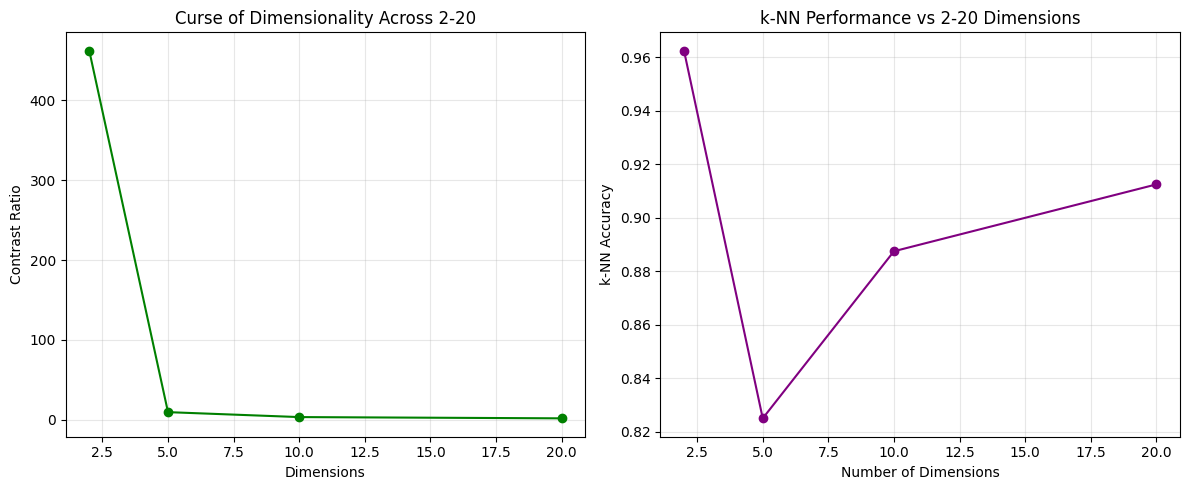

In [305]:
# Visualizations for Dimensions of [2, 5, 10, 20]
fig, (res, kmod) = plt.subplots(1, 2, figsize=(12,5))

# Visualize results for Contrast Ratio across lower number of dimensions.
lowdim_r = results_data.iloc[:4]
res.plot(lowdim_r['Dimensions'], lowdim_r['Contrast Ratio'], color = 'green', marker ='o')
res.set_xlabel('Dimensions')
res.set_ylabel('Contrast Ratio')
res.set_title('Curse of Dimensionality Across 2-20')
res.grid(True, alpha=0.3)

# Visualize k-NN performance across lower number of dimensions.
lowdim_k = performance.iloc[:4]
kmod.plot(lowdim_k['Dimensions'], lowdim_k['Accuracy'], color = 'purple', marker ='o')
kmod.set_xlabel('Number of Dimensions')
kmod.set_ylabel('k-NN Accuracy')
kmod.set_title('k-NN Performance vs 2-20 Dimensions')
kmod.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

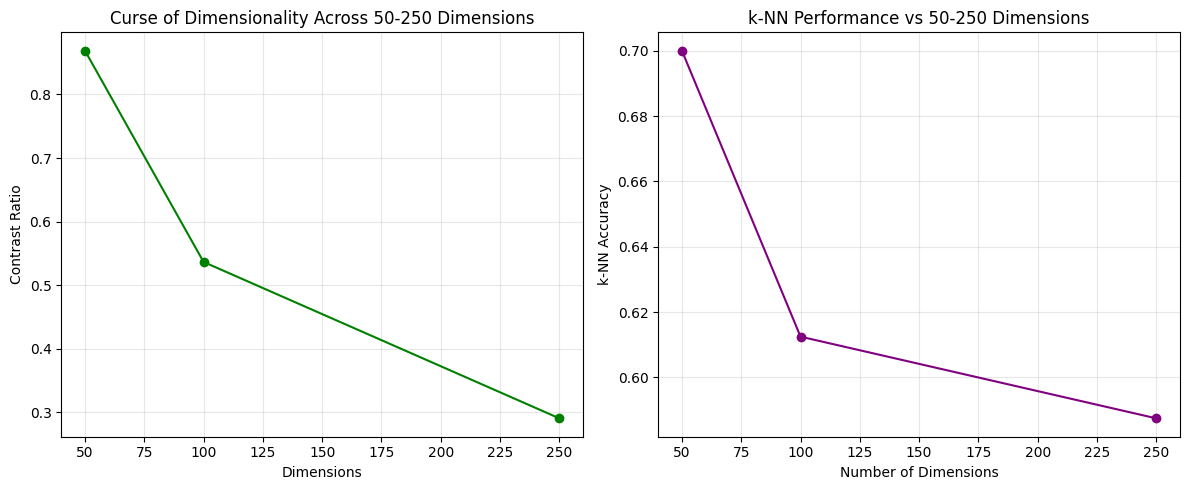

In [306]:
# Visualizations for Dimensions of [50, 100, 250]
fig, (res, kmod) = plt.subplots(1, 2, figsize=(12,5))

# Visualize results for Contrast Ratio across higher number of dimensions.
highdim_r = results_data.iloc[4:]
res.plot(highdim_r['Dimensions'], highdim_r['Contrast Ratio'], color = 'green', marker ='o')
res.set_xlabel('Dimensions')
res.set_ylabel('Contrast Ratio')
res.set_title('Curse of Dimensionality Across 50-250 Dimensions')
res.grid(True, alpha=0.3)

# Visualize k-NN performance across lower higher of dimensions.
highdim_k = performance.iloc[4:]
kmod.plot(highdim_k['Dimensions'], highdim_k['Accuracy'], color = 'purple', marker ='o')
kmod.set_xlabel('Number of Dimensions')
kmod.set_ylabel('k-NN Accuracy')
kmod.set_title('k-NN Performance vs 50-250 Dimensions')
kmod.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.2 Curse of Dimensionality Analysis:

As dimensions increase, a model's performance decreases. The distance calcultions become increasingly unreliable, with high values of differences and lower accuracy. However, within a k-NN model, the mode's accuracy decreases at 5 dimensions and increases again until 100 dimensions. This highlights that k-NN models are better able to handle high dimensionality at a particular limit. In this model, all points become equally distant at 5 features, similar to the k-NN model's initial decline.

# Personal Analysis:

The dataset analyzed in this assignment was the California Housing dataset, inlcuding the target variable of median house value and feature values. Through a comprehensive EDA, it was determined that the California's geography, specifically coastal cities, and individual income strongly contribute to house prices. Initially, a potential challange noted was extreme outliers across all features, including median house value. RobustScaler() was reccomended to address outliers because of measurement of values against quartiles of the data, rather than averages.

In part two, the data was preprocessed to address potential missing values and outliers. Statistical and Z-score approaches were defined as functions to remove outliers. The Statistical Outlier Detection removed 1071 rows and had a greater visualized impact on outliers. Therefore, this approach was applied to detect and remove outliers in the dataset. Additionally, ratio features, geographic features, and categorical features were added into the dataset to better represent information. 

Distance metric functions and a custom class k-NN model were defined in part three. An alternative approach I considered and would have implemented was incorporating these functions into the class. However, I was still able to translate the defined functions into the class. In part four, I applied the three distance metrics across three data points manually and verified the results using previously defined functions. In 4.1, I calculated the distances between median income and house values. In 4.2, I manually implemented a neighbor finding algorithm, showing all Euclidean calculations for first ten points. The closest neighbor I found had a distance of 113.643. This calculation was extended to loop through all points within the dataset. The closest neighbor following this had a distance of 5.918. The Euclidean distance metric and uniform weights are best-suited for simple, continous models in which each point holds the same weight. 

Part five was the most challenging component of ths assignment. In this section, the dataset was split, fit, and scaled through RobustScaler(). Categorical features were encoded using OneHotEncoding and included within the model. After implementing a grid search function, the best parameters were 11 nearest neighbors, the manhattan distance, and distance weights. The performance visualizations displayed the manhattan distance metric's ability to perform better against Euclidean in all k-values and weights. In this case scenario, Manhattan distance is preferable to Euclidean due to the high dimensionality and skewed distributions of the dataset. The model preformed with greater accuracy at lower k values (9-11). A low k increases the risk of overfitting a model / high variance, while a high k increases underfitting a model / high bias. Similar results were found in the Curse of Dimensionality analysis. 

There were no differences in model performance between the implemented model and sklearn's kNN model, which indicated successful implementation. Despite the complexity of the assignment, implementing the model increased my understanding of k-NN and the inner calculations of the model. The limitations of my implementation include time, as the model is slow due to a large number of data points and dimensions. I would improve the model if I had more time by testing different functions and tools available in python. However, real-world applications that could benefit from my analysis include researchers handling high-dimensional data, and firms or governments attempting to analyze house prices. 

